##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, mean_squared_error

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,r2_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.metrics import recall_score

from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Collection

The data is collected from the UCI Machine Learning Repository

## Data Pre-Processing

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/SEM 6 Mini Project /Data/processed.cleveland.data', header=None)

In [4]:
df1['source'] = 'Cleveland'

In [5]:
df1

0    1    2      3      4    5    6      7    8    9   10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    ?  3.0   

     13     source  
0     0  Cleveland  
1     2  Cleveland  
2     1  Cleveland  
3     0  Cleveland  
4     0  Cleveland  
..   ..        ...  
298   1  Cleveland  
299   2  Cleveland  
300   3  Cleveland  
301   1  Cleveland  
302   0  Cleveland  

[303 rows x 15 columns]

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/SEM 6 Mini Project /Data/processed.hungarian.data', header=None)

In [7]:
df2['source'] = 'Hungary'

In [8]:
df2

0  1  2    3    4  5  6    7  8    9 10 11 12  13   source
0    28  1  2  130  132  0  2  185  0  0.0  ?  ?  ?   0  Hungary
1    29  1  2  120  243  0  0  160  0  0.0  ?  ?  ?   0  Hungary
2    29  1  2  140    ?  0  0  170  0  0.0  ?  ?  ?   0  Hungary
3    30  0  1  170  237  0  1  170  0  0.0  ?  ?  6   0  Hungary
4    31  0  2  100  219  0  1  150  0  0.0  ?  ?  ?   0  Hungary
..   .. .. ..  ...  ... .. ..  ... ..  ... .. .. ..  ..      ...
289  52  1  4  160  331  0  0   94  1  2.5  ?  ?  ?   1  Hungary
290  54  0  3  130  294  0  1  100  1  0.0  2  ?  ?   1  Hungary
291  56  1  4  155  342  1  0  150  1  3.0  2  ?  ?   1  Hungary
292  58  0  2  180  393  0  0  110  1  1.0  2  ?  7   1  Hungary
293  65  1  4  130  275  0  1  115  1  1.0  2  ?  ?   1  Hungary

[294 rows x 15 columns]

In [9]:
df3 = pd.read_csv('/content/drive/MyDrive/SEM 6 Mini Project /Data/processed.switzerland.data', header=None)

In [10]:
df3['source'] = 'Switzerland'

In [11]:
df3

0  1  2    3  4  5  6    7  8    9 10 11 12  13       source
0    32  1  1   95  0  ?  0  127  0   .7  1  ?  ?   1  Switzerland
1    34  1  4  115  0  ?  ?  154  0   .2  1  ?  ?   1  Switzerland
2    35  1  4    ?  0  ?  0  130  1    ?  ?  ?  7   3  Switzerland
3    36  1  4  110  0  ?  0  125  1    1  2  ?  6   1  Switzerland
4    38  0  4  105  0  ?  0  166  0  2.8  1  ?  ?   2  Switzerland
..   .. .. ..  ... .. .. ..  ... ..  ... .. .. ..  ..          ...
118  70  1  4  115  0  0  1   92  1    0  2  ?  7   1  Switzerland
119  70  1  4  140  0  1  0  157  1    2  2  ?  7   3  Switzerland
120  72  1  3  160  0  ?  2  114  0  1.6  2  2  ?   0  Switzerland
121  73  0  3  160  0  0  1  121  0    0  1  ?  3   1  Switzerland
122  74  1  2  145  0  ?  1  123  0  1.3  1  ?  ?   1  Switzerland

[123 rows x 15 columns]

In [12]:
df4 = pd.read_csv('/content/drive/MyDrive/SEM 6 Mini Project /Data/processed.va.data', header=None)

In [13]:
df4['source'] = 'Long Island VA'

In [14]:
df4

0  1  2    3    4  5  6    7  8    9 10 11 12  13          source
0    63  1  4  140  260  0  1  112  1    3  2  ?  ?   2  Long Island VA
1    44  1  4  130  209  0  1  127  0    0  ?  ?  ?   0  Long Island VA
2    60  1  4  132  218  0  1  140  1  1.5  3  ?  ?   2  Long Island VA
3    55  1  4  142  228  0  1  149  1  2.5  1  ?  ?   1  Long Island VA
4    66  1  3  110  213  1  2   99  1  1.3  2  ?  ?   0  Long Island VA
..   .. .. ..  ...  ... .. ..  ... ..  ... .. .. ..  ..             ...
195  54  0  4  127  333  1  1  154  0    0  ?  ?  ?   1  Long Island VA
196  62  1  1    ?  139  0  1    ?  ?    ?  ?  ?  ?   0  Long Island VA
197  55  1  4  122  223  1  1  100  0    0  ?  ?  6   2  Long Island VA
198  58  1  4    ?  385  1  2    ?  ?    ?  ?  ?  ?   0  Long Island VA
199  62  1  2  120  254  0  2   93  1    0  ?  ?  ?   1  Long Island VA

[200 rows x 15 columns]

In [15]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [16]:
df

0    1    2      3      4    5    6      7    8    9   10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
915  54.0  0.0  4.0    127    333    1    1    154    0    0    ?    ?    ?   
916  62.0  1.0  1.0      ?    139    0    1      ?    ?    ?    ?    ?    ?   
917  55.0  1.0  4.0    122    223    1    1    100    0    0    ?    ?    6   
918  58.0  1.0  4.0      ?    385    1    2      ?    ?    ?    ?    ?    ?   
919  62.0  1.0  2.0    120    254    0    2     93    1    0    ?    ?    ?   

     13          source  
0     0       Cleveland  
1     2       Cleveland  
2     1       Cleveland  
3     0       Cleveland  
4     0       Cleveland  
..   ..             ...  
915   1  Long Island VA  
916   0  Long Island VA  
917   2  Long Island VA  
918   0  Long Island VA  
919   1  Long Island VA  

[920 rows x 15 columns]

In [17]:
new_columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'num',
    'source']

In [18]:
df.columns = new_columns

In [19]:
df

age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0    63.0  1.0  1.0    145.0  233.0  1.0     2.0   150.0   0.0     2.3   3.0   
1    67.0  1.0  4.0    160.0  286.0  0.0     2.0   108.0   1.0     1.5   2.0   
2    67.0  1.0  4.0    120.0  229.0  0.0     2.0   129.0   1.0     2.6   2.0   
3    37.0  1.0  3.0    130.0  250.0  0.0     0.0   187.0   0.0     3.5   3.0   
4    41.0  0.0  2.0    130.0  204.0  0.0     2.0   172.0   0.0     1.4   1.0   
..    ...  ...  ...      ...    ...  ...     ...     ...   ...     ...   ...   
915  54.0  0.0  4.0      127    333    1       1     154     0       0     ?   
916  62.0  1.0  1.0        ?    139    0       1       ?     ?       ?     ?   
917  55.0  1.0  4.0      122    223    1       1     100     0       0     ?   
918  58.0  1.0  4.0        ?    385    1       2       ?     ?       ?     ?   
919  62.0  1.0  2.0      120    254    0       2      93     1       0     ?   

      ca thal  num          source  
0    0.0  6.0    0       Cleveland  
1    3.0  3.0    2       Cleveland  
2    2.0  7.0    1       Cleveland  
3    0.0  3.0    0       Cleveland  
4    0.0  3.0    0       Cleveland  
..   ...  ...  ...             ...  
915    ?    ?    1  Long Island VA  
916    ?    ?    0  Long Island VA  
917    ?    6    2  Long Island VA  
918    ?    ?    0  Long Island VA  
919    ?    ?    1  Long Island VA  

[920 rows x 15 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 107.9+ KB


In [21]:
df.replace('?', np.nan, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    object 
 4   chol      890 non-null    object 
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalach   865 non-null    object 
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    object 
 10  slope     611 non-null    object 
 11  ca        309 non-null    object 
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 107.9+ KB


In [23]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num',
 'source']

In [24]:
columns_to_change = ['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']
df[columns_to_change] = df[columns_to_change].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  num       920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 107.9+ KB


In [26]:
df['age'] = df['age'].astype(int)

In [27]:
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})

In [28]:
df['cp'] = df['cp'].replace({1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'})

In [29]:
df['fbs'] = df['fbs'].replace({1: 'True', 0: 'False'})

In [30]:
df['restecg'] = df['restecg'].replace({0: 'normal', 1: 'ST-T abnormality', 2: 'lv hypertrophy'})

In [31]:
df['exang'] = df['exang'].replace({1: 'True', 0: 'False'})

In [32]:
df['slope'] = df['slope'].replace({1: 'upsloping', 2: 'flat', 3: 'downsloping'})

In [33]:
df['thal'] = df['thal'].replace({3: 'normal', 6: 'fixed defect', 7: 'reversable defect'})

In [34]:
df

age     sex                cp  trestbps   chol    fbs           restecg  \
0     63    Male    typical angina     145.0  233.0   True    lv hypertrophy   
1     67    Male      asymptomatic     160.0  286.0  False    lv hypertrophy   
2     67    Male      asymptomatic     120.0  229.0  False    lv hypertrophy   
3     37    Male  non-anginal pain     130.0  250.0  False            normal   
4     41  Female   atypical angina     130.0  204.0  False    lv hypertrophy   
..   ...     ...               ...       ...    ...    ...               ...   
915   54  Female      asymptomatic     127.0  333.0   True  ST-T abnormality   
916   62    Male    typical angina       NaN  139.0  False  ST-T abnormality   
917   55    Male      asymptomatic     122.0  223.0   True  ST-T abnormality   
918   58    Male      asymptomatic       NaN  385.0   True    lv hypertrophy   
919   62    Male   atypical angina     120.0  254.0  False    lv hypertrophy   

     thalach  exang  oldpeak        slope   ca               thal  num  \
0      150.0  False      2.3  downsloping  0.0       fixed defect    0   
1      108.0   True      1.5         flat  3.0             normal    2   
2      129.0   True      2.6         flat  2.0  reversable defect    1   
3      187.0  False      3.5  downsloping  0.0             normal    0   
4      172.0  False      1.4    upsloping  0.0             normal    0   
..       ...    ...      ...          ...  ...                ...  ...   
915    154.0  False      0.0          NaN  NaN                NaN    1   
916      NaN    NaN      NaN          NaN  NaN                NaN    0   
917    100.0  False      0.0          NaN  NaN       fixed defect    2   
918      NaN    NaN      NaN          NaN  NaN                NaN    0   
919     93.0   True      0.0          NaN  NaN                NaN    1   

             source  
0         Cleveland  
1         Cleveland  
2         Cleveland  
3         Cleveland  
4         Cleveland  
..              ...  
915  Long Island VA  
916  Long Island VA  
917  Long Island VA  
918  Long Island VA  
919  Long Island VA  

[920 rows x 15 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalach   865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


##Handling Null Values

In [36]:
df = pd.read_csv('/content/drive/MyDrive/SEM 6 Mini Project /Data/heart_disease_uci.csv')


In [37]:
df.drop(columns=['id'], inplace=True)

In [38]:
df.head()

age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

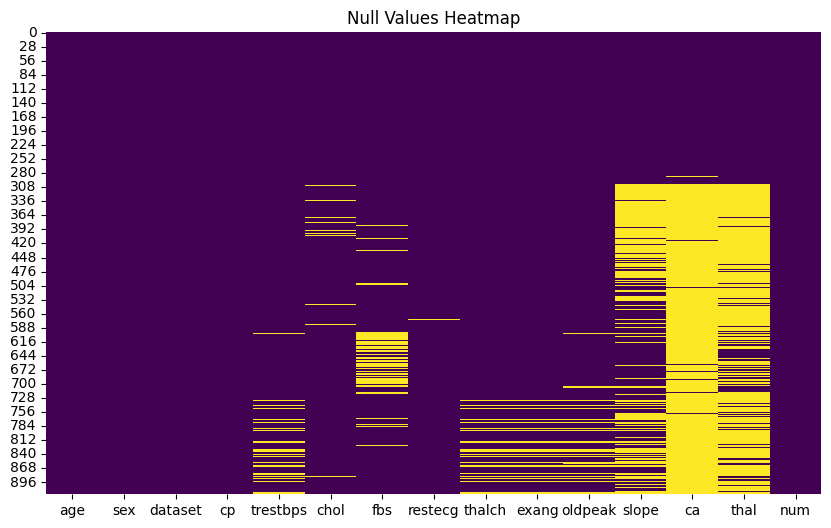

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [40]:
null_percentage = df.isnull().mean() * 100


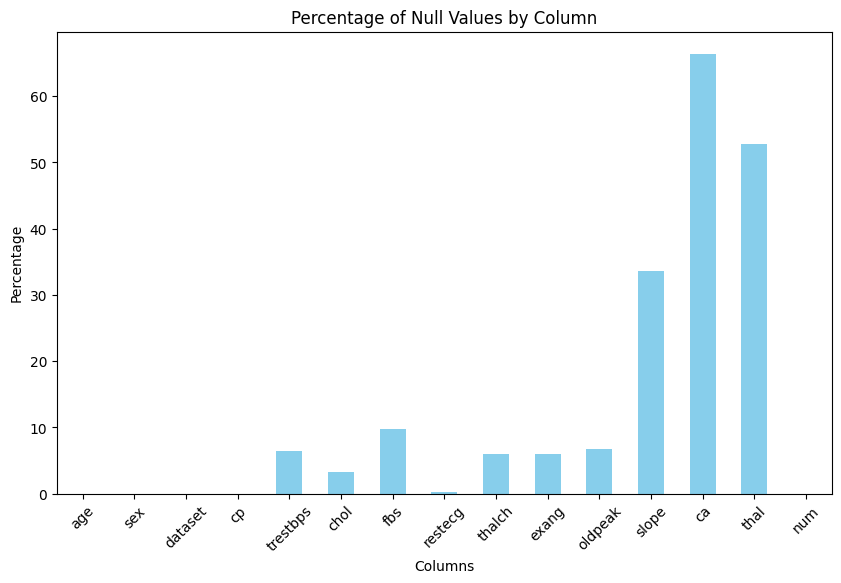

In [41]:
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

In [42]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [43]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

In [44]:
f'Categorical Columns: {cat_cols}'

"Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']"

In [45]:
f'Numerical Columns: {num_cols}'

"Numerical Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']"

In [46]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [48]:
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [49]:
def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [50]:
import warnings
warnings.filterwarnings('ignore')

for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.262023121387283 

RMSE = 17.20797403880629 

R2 = 0.0754353563385165 

Missing Values chol : 3.26%
MAE = 53.09488764044944 

RMSE = 75.92088427502095 

R2 = 0.5433944761391525 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Missing Values thalch : 5.98%
MAE = 17.052312138728325 

RMSE = 22.05251861934703 

R2 = 0.2928595046302418 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5690058139534884 

RMSE = 0.7891469231258965 

R2 = 0.40670091183785506 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



In [51]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

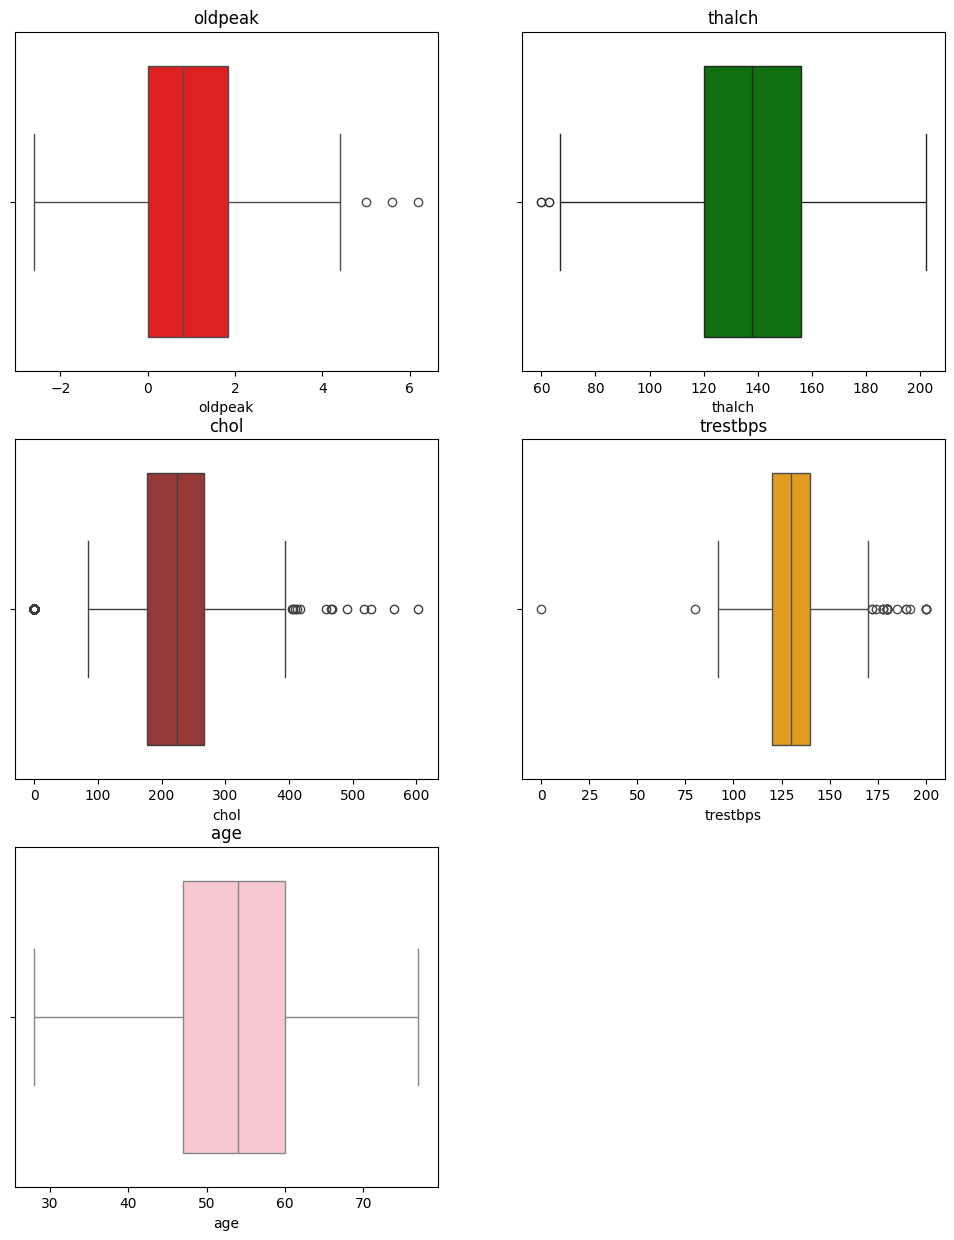

In [52]:
plt.figure(figsize=(12, 15))

colors = ['red', 'green', 'brown', 'orange', 'pink']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [53]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [54]:
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [55]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 200]

age     sex      dataset            cp  trestbps   chol    fbs  \
126   56  Female    Cleveland  asymptomatic     200.0  288.0   True   
548   54    Male      Hungary  asymptomatic     200.0  198.0  False   
680   61    Male  Switzerland   non-anginal     200.0    0.0  False   
701   64  Female  Switzerland  asymptomatic     200.0    0.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
126    lv hypertrophy   133.0   True      4.0  downsloping  2.0   
548            normal   142.0   True      2.0         flat  0.0   
680  st-t abnormality    70.0  False      0.0         flat  2.0   
701            normal   140.0   True      1.0         flat  0.0   

                  thal  num  
126  reversable defect    3  
548  reversable defect    1  
680             normal    3  
701             normal    3

In [56]:
df

age     sex        dataset               cp  trestbps   chol    fbs  \
0     63    Male      Cleveland   typical angina    145.00  233.0   True   
1     67    Male      Cleveland     asymptomatic    160.00  286.0  False   
2     67    Male      Cleveland     asymptomatic    120.00  229.0  False   
3     37    Male      Cleveland      non-anginal    130.00  250.0  False   
4     41  Female      Cleveland  atypical angina    130.00  204.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
915   54  Female  VA Long Beach     asymptomatic    127.00  333.0   True   
916   62    Male  VA Long Beach   typical angina    137.72  139.0  False   
917   55    Male  VA Long Beach     asymptomatic    122.00  223.0   True   
918   58    Male  VA Long Beach     asymptomatic    146.22  385.0   True   
919   62    Male  VA Long Beach  atypical angina    120.00  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy  150.00  False    2.300  downsloping  0.0   
1      lv hypertrophy  108.00   True    1.500         flat  3.0   
2      lv hypertrophy  129.00   True    2.600         flat  2.0   
3              normal  187.00  False    3.500  downsloping  0.0   
4      lv hypertrophy  172.00  False    1.400    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality  154.00  False    0.000         flat  0.0   
916  st-t abnormality  129.53  False    1.834         flat  0.0   
917  st-t abnormality  100.00  False    0.000         flat  1.0   
918    lv hypertrophy  121.25   True    2.512         flat  0.0   
919    lv hypertrophy   93.00   True    0.000         flat  1.0   

                  thal  num  
0         fixed defect    0  
1               normal    2  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
915             normal    1  
916  reversable defect    0  
917       fixed defect    2  
918  reversable defect    0  
919  reversable defect    1  

[919 rows x 15 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       919 non-null    int64  
 1   sex       919 non-null    object 
 2   dataset   919 non-null    object 
 3   cp        919 non-null    object 
 4   trestbps  919 non-null    float64
 5   chol      919 non-null    float64
 6   fbs       919 non-null    object 
 7   restecg   919 non-null    object 
 8   thalch    919 non-null    float64
 9   exang     919 non-null    object 
 10  oldpeak   919 non-null    float64
 11  slope     919 non-null    object 
 12  ca        919 non-null    float64
 13  thal      919 non-null    object 
 14  num       919 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.9+ KB


In [58]:
df.drop(columns=['dataset'], inplace=True)

In [59]:
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})

In [60]:
df['cp'] = df['cp'].replace({'typical angina': 1, 'atypical angina': 2, 'non-anginal': 3, 'asymptomatic': 4})

In [61]:
df['fbs'] = df['fbs'].astype(int)

In [62]:
df['exang'] = df['exang'].astype(int)

In [63]:
df['ca'] = df['ca'].astype(int)

In [64]:
df['restecg'] = df['restecg'].replace({'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2})

In [65]:
df['slope'] = df['slope'].replace({'upsloping': 1, 'flat': 2, 'downsloping': 3})

In [66]:
df['thal'] = df['thal'].replace({'normal': 3, 'fixed defect': 6, 'reversable defect': 7})

In [67]:
df['num'] = df['num'].replace({1: 1, 2: 1, 3: 1, 4: 1})

In [68]:
df.rename(columns={'num': 'target'}, inplace=True)

In [69]:
df

age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   1    145.00  233.0    1        2  150.00      0    2.300   
1     67    1   4    160.00  286.0    0        2  108.00      1    1.500   
2     67    1   4    120.00  229.0    0        2  129.00      1    2.600   
3     37    1   3    130.00  250.0    0        0  187.00      0    3.500   
4     41    0   2    130.00  204.0    0        2  172.00      0    1.400   
..   ...  ...  ..       ...    ...  ...      ...     ...    ...      ...   
915   54    0   4    127.00  333.0    1        1  154.00      0    0.000   
916   62    1   1    137.72  139.0    0        1  129.53      0    1.834   
917   55    1   4    122.00  223.0    1        1  100.00      0    0.000   
918   58    1   4    146.22  385.0    1        2  121.25      1    2.512   
919   62    1   2    120.00  254.0    0        2   93.00      1    0.000   

     slope  ca  thal  target  
0        3   0     6       0  
1        2   3     3       1  
2        2   2     7       1  
3        3   0     3       0  
4        1   0     3       0  
..     ...  ..   ...     ...  
915      2   0     3       1  
916      2   0     7       0  
917      2   1     6       1  
918      2   0     7       0  
919      2   1     7       1  

[919 rows x 14 columns]

In [70]:
df.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   1     145.0  233.0    1        2   150.0      0      2.3      3   
1   67    1   4     160.0  286.0    0        2   108.0      1      1.5      2   
2   67    1   4     120.0  229.0    0        2   129.0      1      2.6      2   
3   37    1   3     130.0  250.0    0        0   187.0      0      3.5      3   
4   41    0   2     130.0  204.0    0        2   172.0      0      1.4      1   

   ca  thal  target  
0   0     6       0  
1   3     3       1  
2   2     7       1  
3   0     3       0  
4   0     3       0

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       919 non-null    int64  
 1   sex       919 non-null    int64  
 2   cp        919 non-null    int64  
 3   trestbps  919 non-null    float64
 4   chol      919 non-null    float64
 5   fbs       919 non-null    int64  
 6   restecg   919 non-null    int64  
 7   thalch    919 non-null    float64
 8   exang     919 non-null    int64  
 9   oldpeak   919 non-null    float64
 10  slope     919 non-null    int64  
 11  ca        919 non-null    int64  
 12  thal      919 non-null    int64  
 13  target    919 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 107.7 KB


##Exploratory Data Analysis

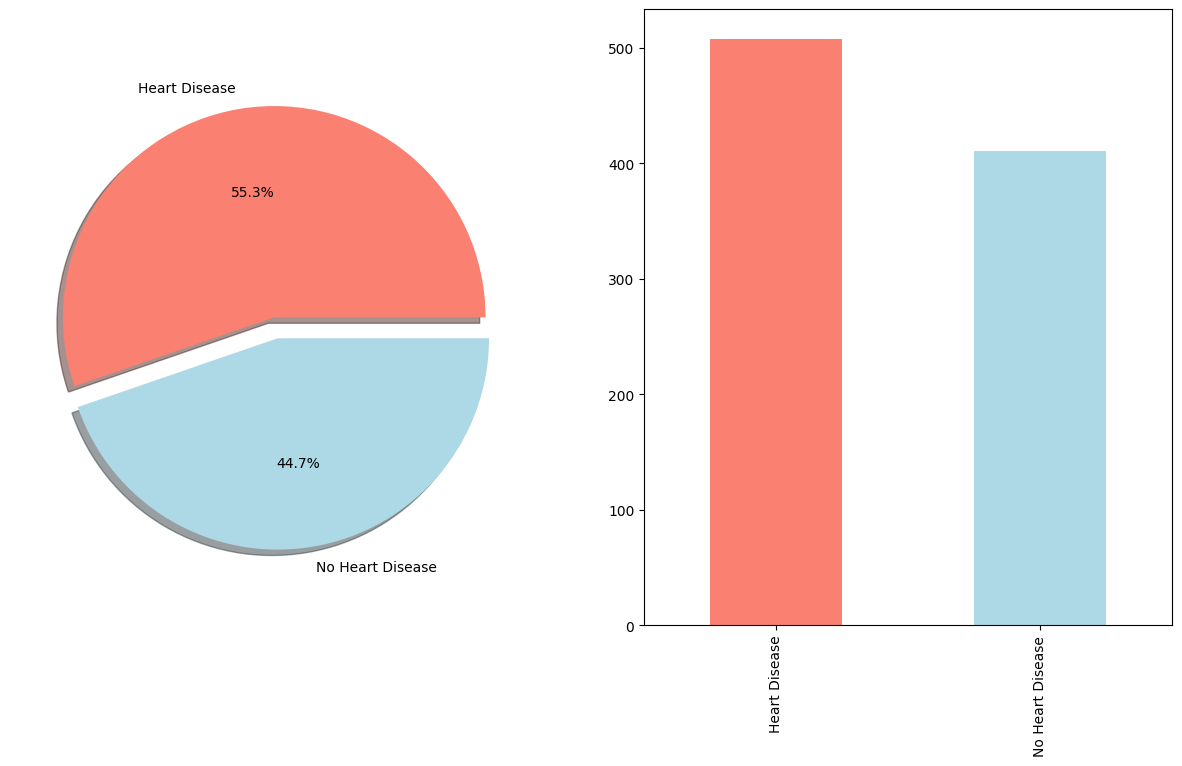

In [72]:
# Visualizing the Target
f,ax=plt.subplots(1,2,figsize=(15,8))
df["target"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="pie",colors=["salmon","lightblue"],ax=ax[0],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax[0].set_ylabel('')
df["target"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="bar", ax = ax[1],color=["salmon","lightblue"])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

target
1    508
0    411
Name: count, dtype: int64


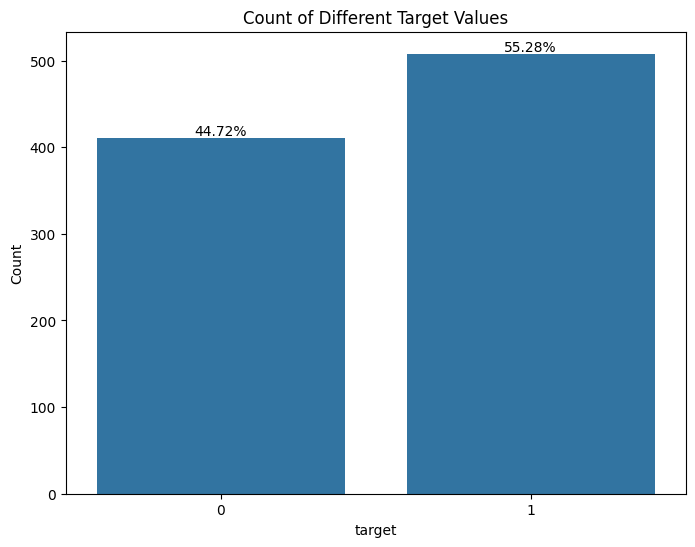

In [73]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df)
target_temp = df["target"].value_counts()
total = target_temp.sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")
print(target_temp)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Count of Different Target Values')
plt.show()


Percentage of patient with or without heart problems in the given dataset

In [74]:
print("Percentage of patients without heart problems: " + str(round(target_temp[0] * 100 / total, 2)))
print("Percentage of patients with heart problems: " + str(round(target_temp[1] * 100 / total, 2)))

Percentage of patients without heart problems: 44.72
Percentage of patients with heart problems: 55.28


In [75]:
df["sex"].unique()

array([1, 0])

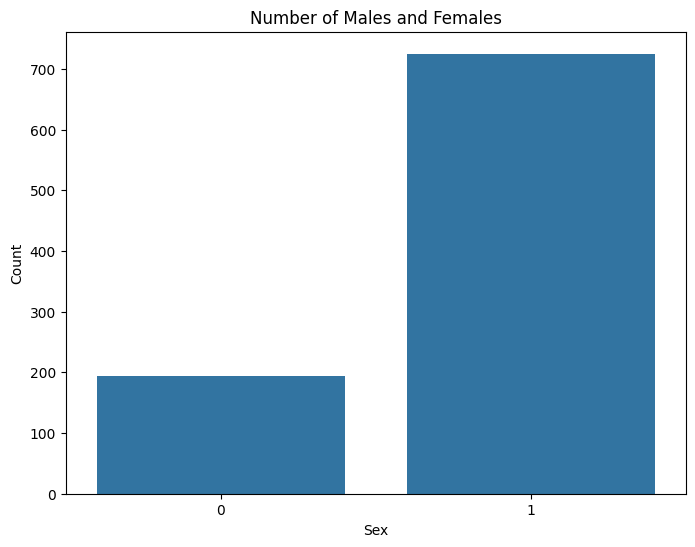

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Males and Females')
plt.show()

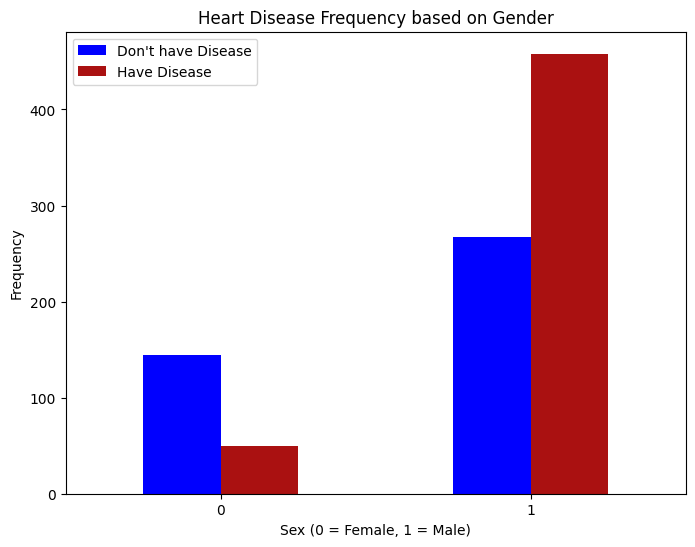

In [77]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(8,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency based on Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()



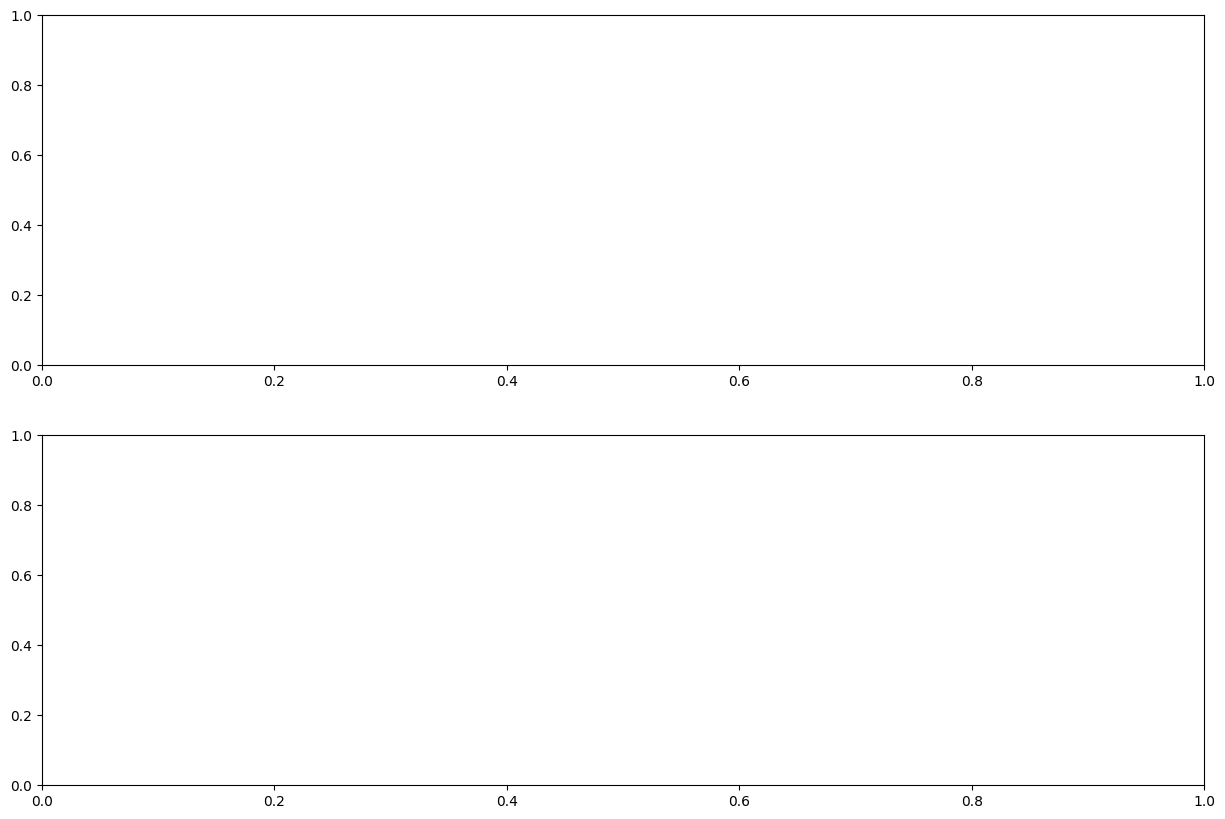

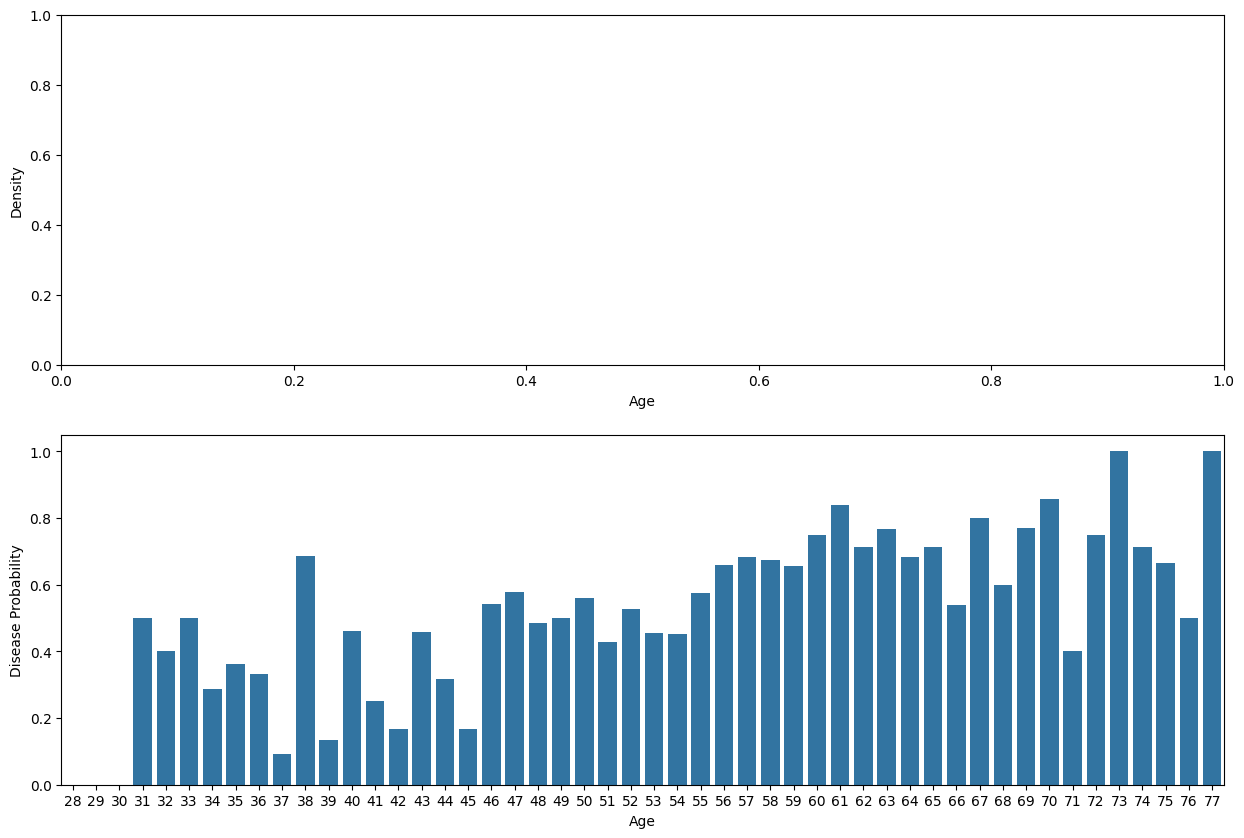

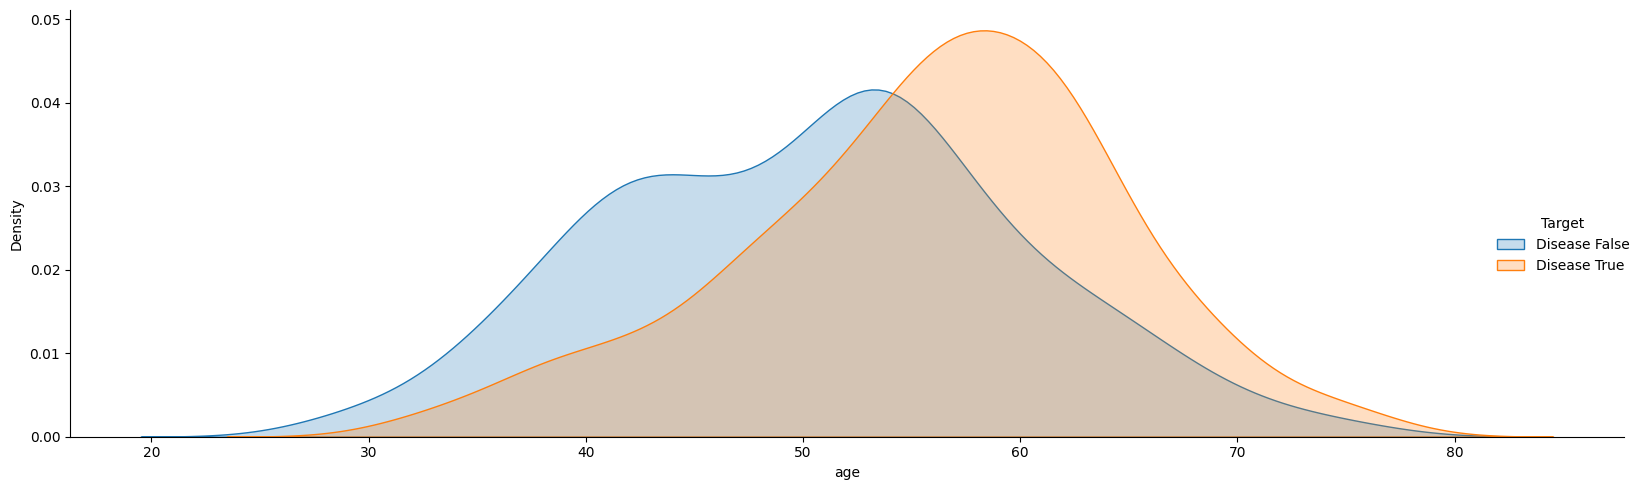

In [78]:
def plotAge():
    fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

    facet_grid = sns.FacetGrid(df, hue='target', height=5, aspect=3)
    facet_grid.map(sns.kdeplot, "age", shade=True)
    facet_grid.add_legend(title='Target', labels=['Disease False', 'Disease True'])
    axes[0].set(xlabel='Age', ylabel='Density')

    avg = df.groupby('age')['target'].mean().reset_index()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='Disease Probability')

    plt.tight_layout()  # Adjust layout to prevent overlap of axes labels and titles

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plotAge()
plt.show()

In [79]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.sex))*100))

Percentage of Female Patients:21.11%
Percentage of Male Patients:78.89%


In [80]:
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [81]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [82]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

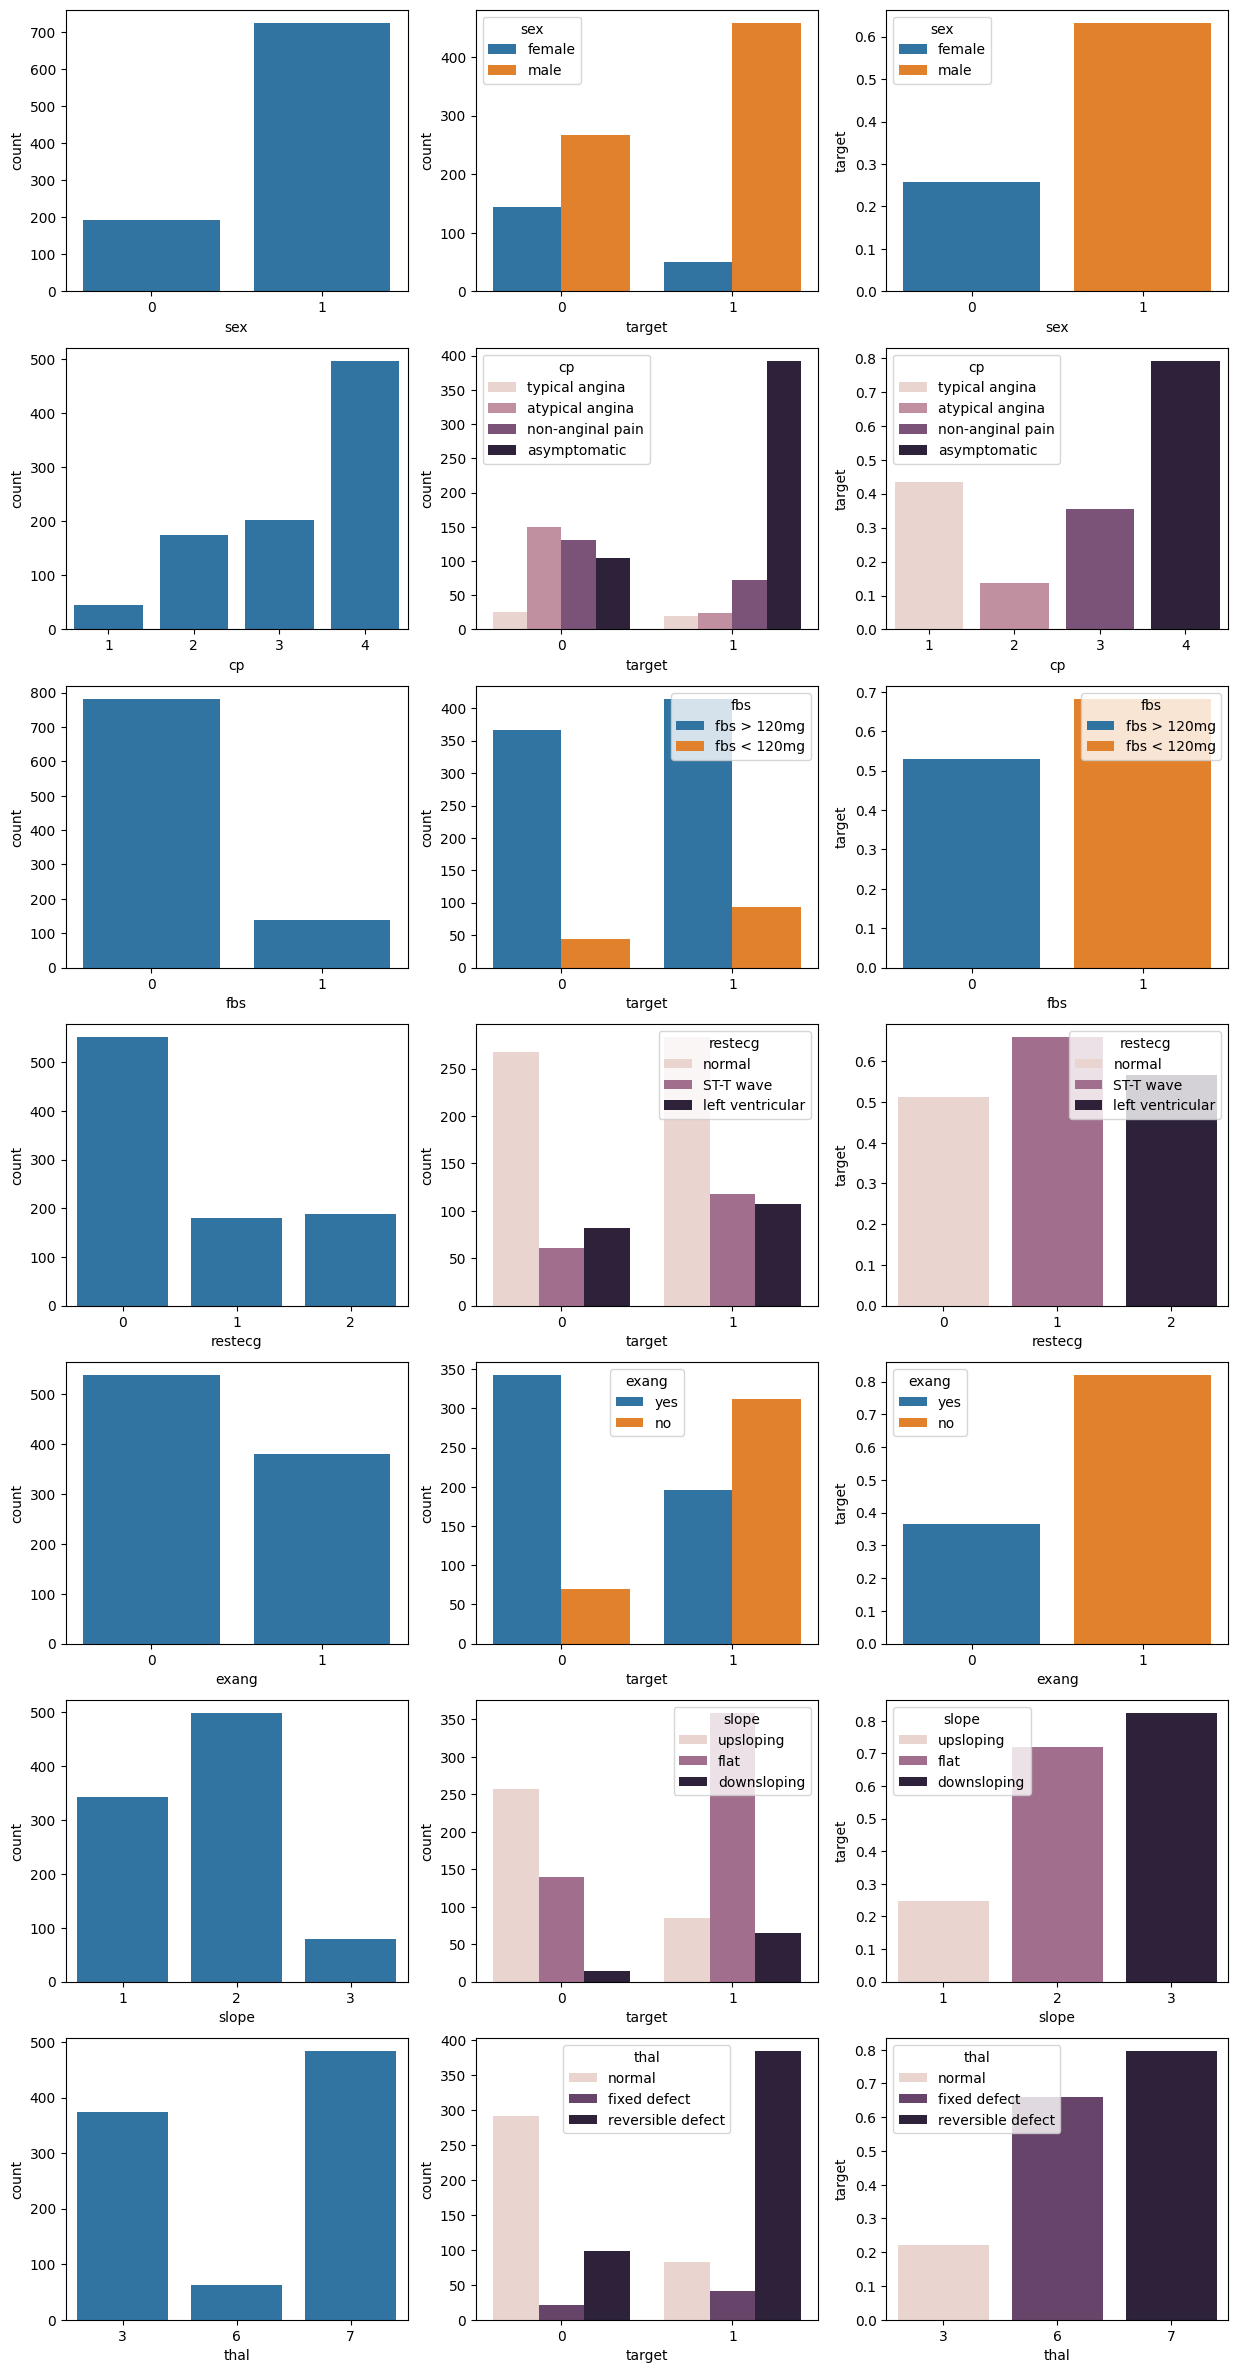

In [83]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [84]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalch', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [85]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=df, ax=axes[ax_index][1])

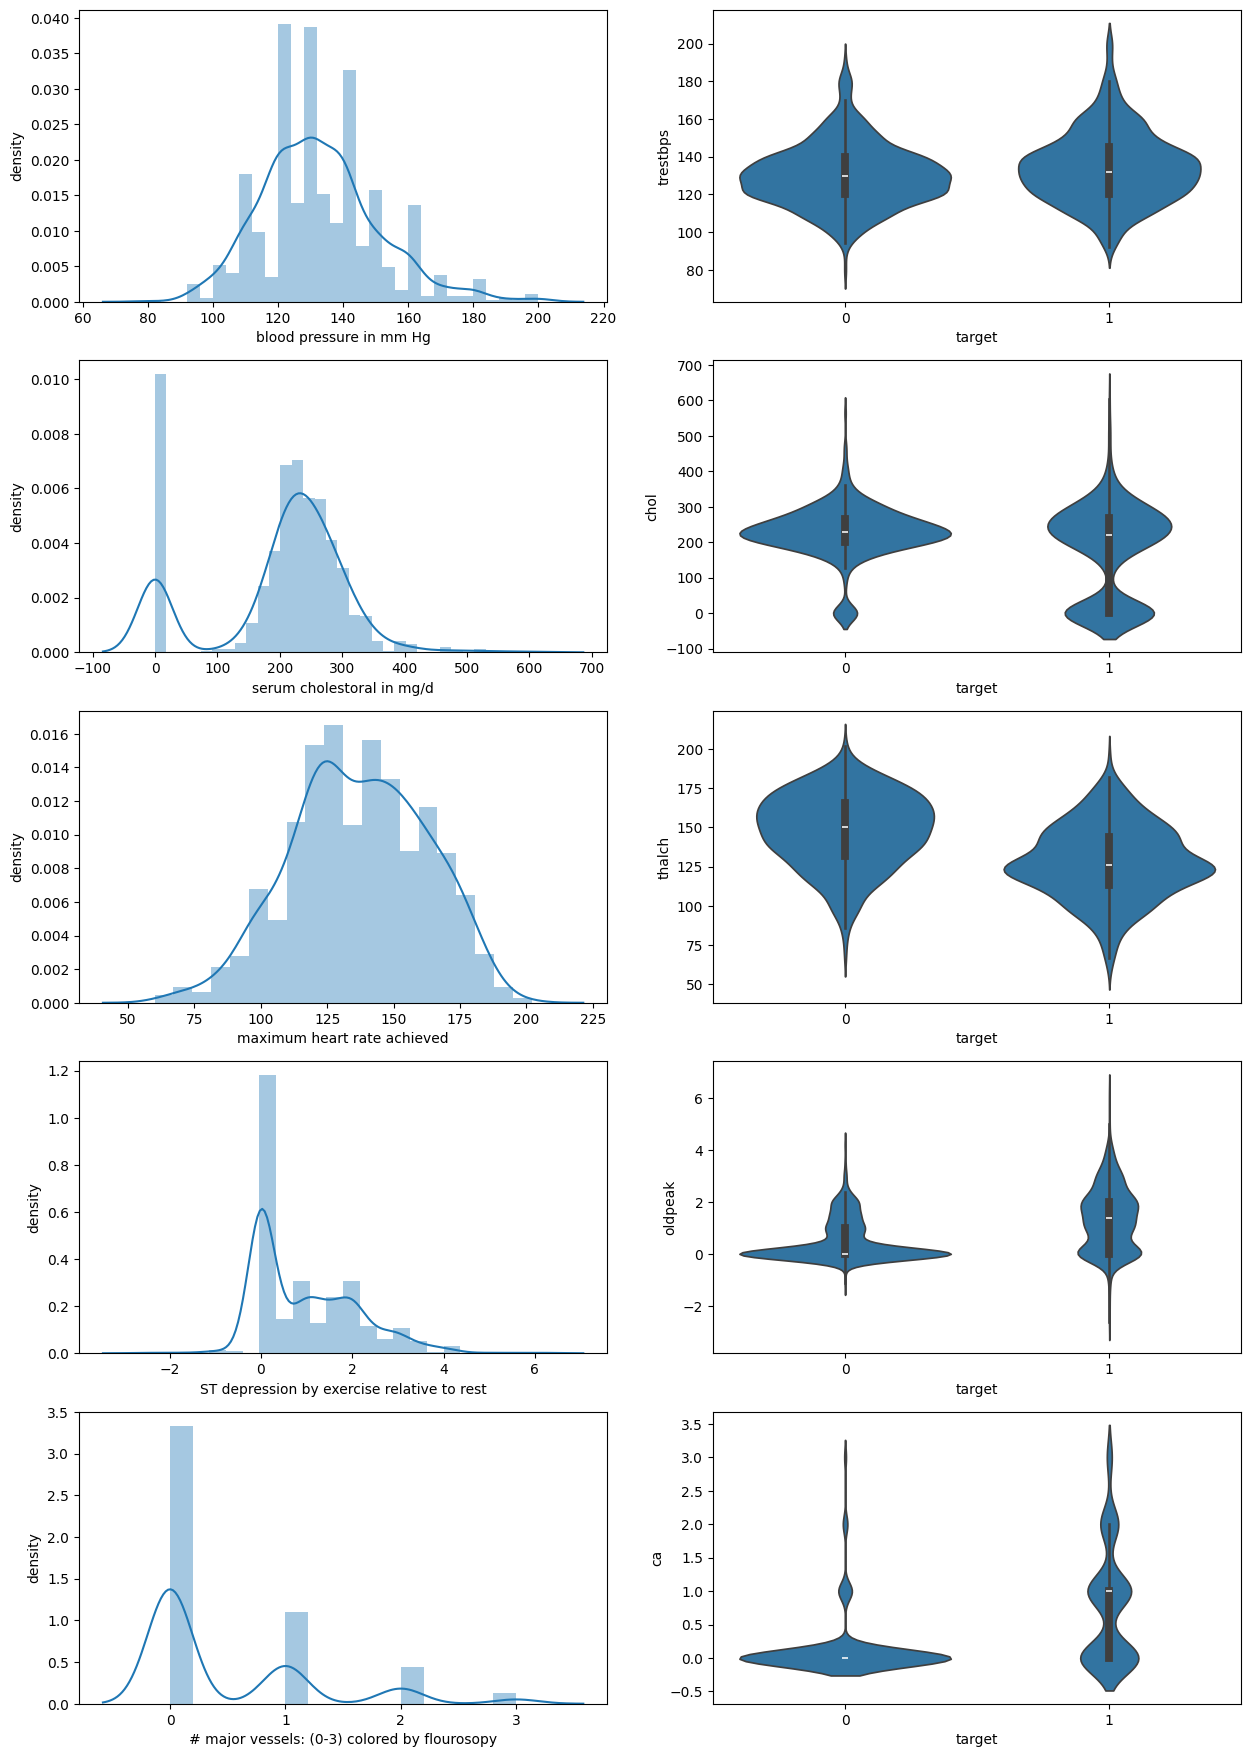

In [86]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)


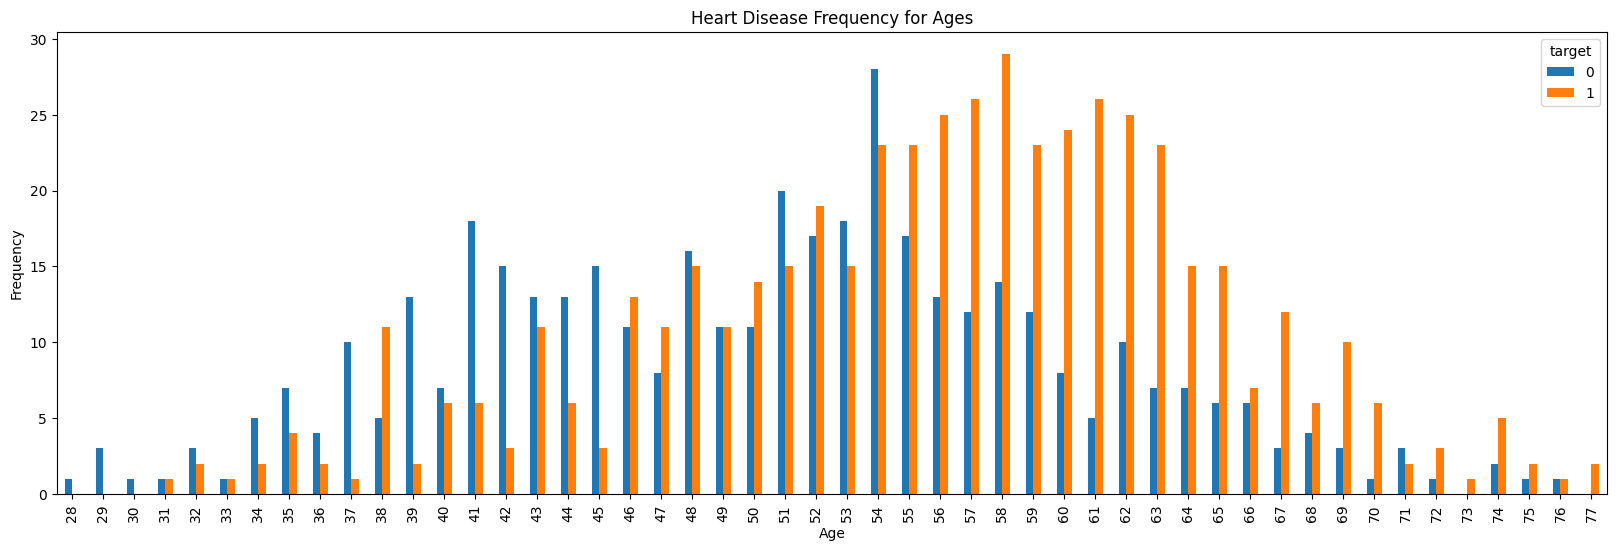

In [87]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

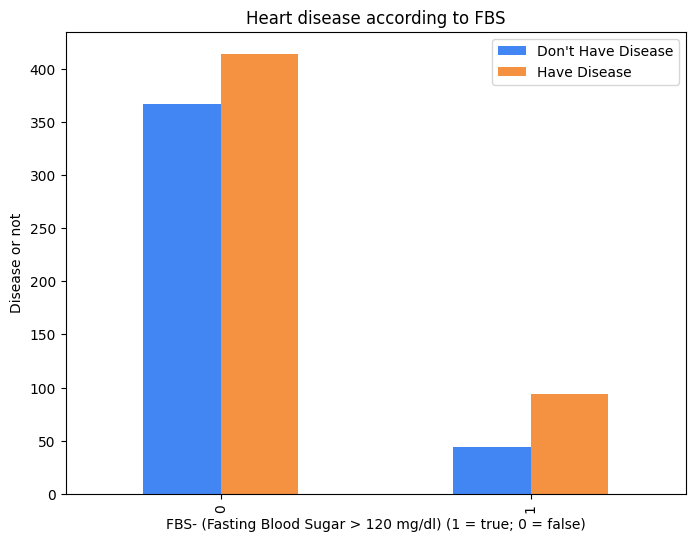

In [88]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(8,6),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [89]:
df["cp"].unique()

array([1, 4, 3, 2])

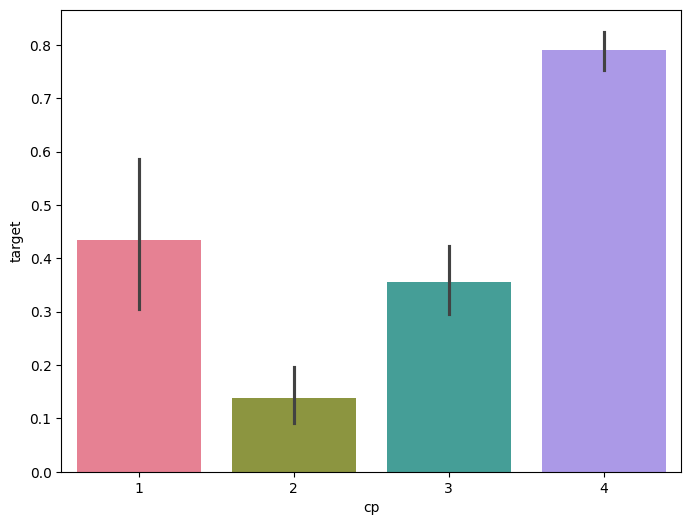

In [90]:
colors = sns.color_palette("husl", len(df["cp"].unique()))
plt.figure(figsize=(8, 6))
sns.barplot(x=df["cp"], y=df["target"], palette=colors)
plt.show()

In [91]:
df["trestbps"].unique()

array([145.  , 160.  , 120.  , 130.  , 140.  , 172.  , 150.  , 110.  ,
       132.  , 117.  , 135.  , 112.  , 105.  , 124.  , 125.  , 142.  ,
       128.  , 170.  , 155.  , 104.  , 180.  , 138.  , 108.  , 134.  ,
       122.  , 115.  , 118.  , 100.  , 200.  ,  94.  , 165.  , 102.  ,
       152.  , 101.  , 126.  , 174.  , 148.  , 178.  , 158.  , 192.  ,
       129.  , 144.  , 123.  , 136.  , 146.  , 106.  , 156.  , 154.  ,
       114.  , 164.  ,  98.  , 190.  , 134.82, 113.  ,  92.  ,  95.  ,
       128.16,  80.  , 185.  , 140.17, 137.03, 116.  , 137.5 , 133.93,
       129.61, 131.49, 135.37, 138.64, 140.05, 144.34, 132.31, 142.2 ,
       137.29, 136.18, 127.52, 139.23, 138.91, 135.99, 130.21, 130.73,
       133.2 , 134.9 , 132.1 ,  96.  , 129.13, 134.77, 134.12, 127.34,
       139.01, 129.28, 136.49, 138.15, 140.45, 135.98, 134.05, 142.84,
       136.91, 139.58, 140.32, 136.21, 132.52, 132.72, 131.37, 142.52,
       141.  , 137.05, 144.6 , 141.7 , 146.37, 130.69, 137.38, 138.97,
      

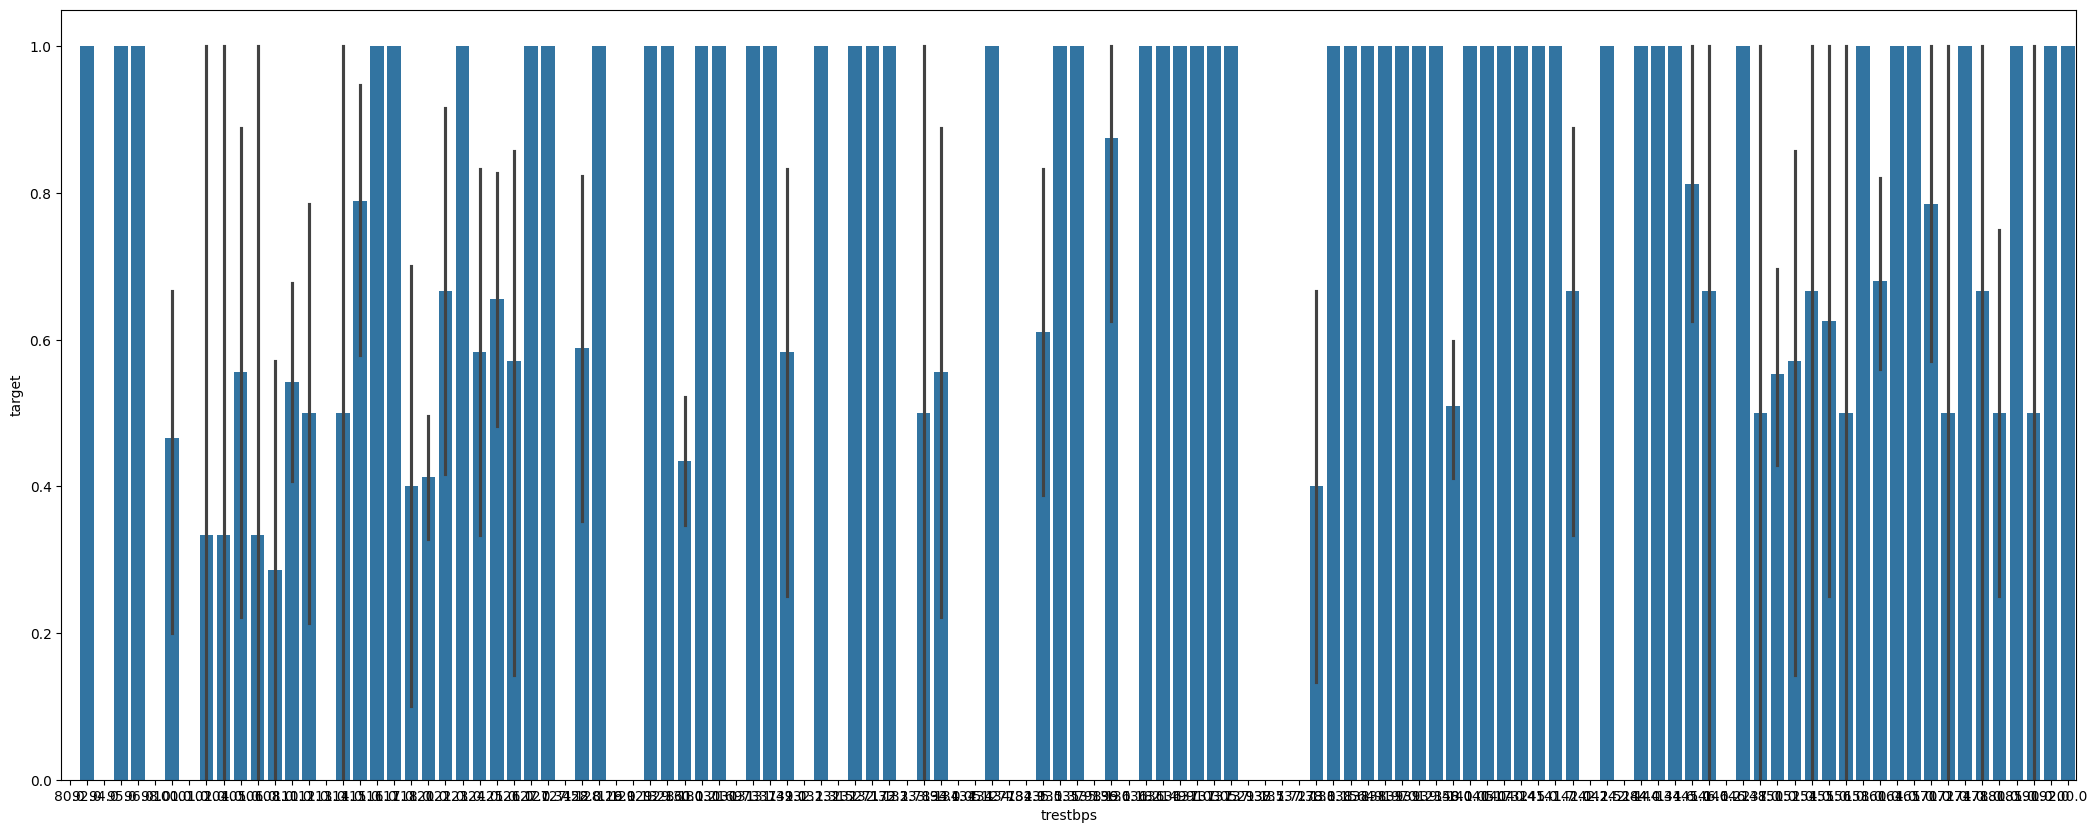

In [92]:
plt.figure(figsize=(26, 10))
sns.barplot(x=df["trestbps"], y=df["target"])
plt.show()

In [93]:
df["restecg"].unique()

array([2, 0, 1])

<Axes: xlabel='restecg', ylabel='target'>

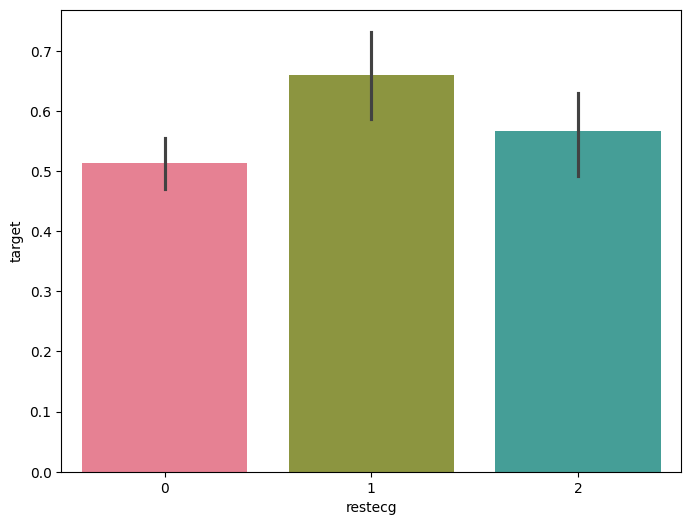

In [94]:
colors = sns.color_palette("husl", len(df["cp"].unique()))
plt.figure(figsize=(8, 6))
sns.barplot(x=df["restecg"],y=df["target"], palette=colors)

In [95]:
df["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

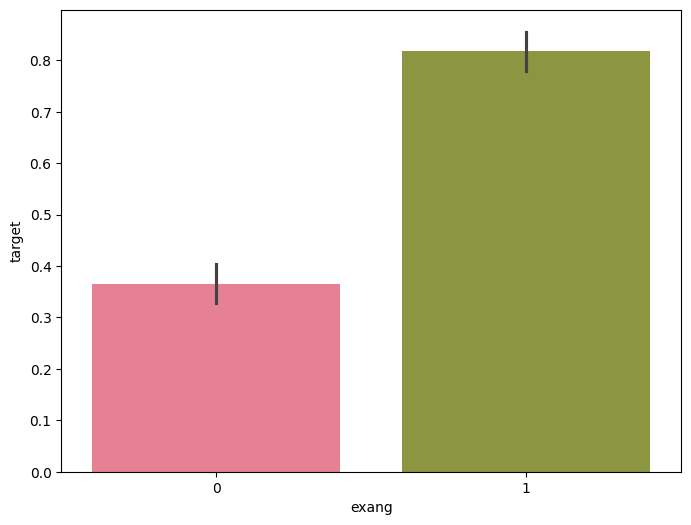

In [96]:
colors = sns.color_palette("husl", len(df["cp"].unique()))
plt.figure(figsize=(8, 6))
sns.barplot(x=df["exang"],y=df["target"], palette=colors)

In [97]:
df["slope"].unique()

array([3, 2, 1])

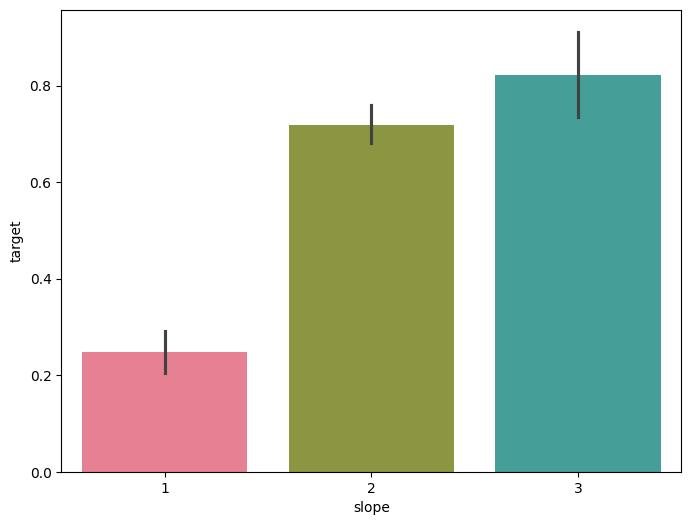

In [98]:
colors = sns.color_palette("husl", len(df["cp"].unique()))
plt.figure(figsize=(8, 6))
sns.barplot(x=df["slope"], y=df["target"], palette=colors)
plt.show()

In [99]:
df["ca"].unique()

array([0, 3, 2, 1])

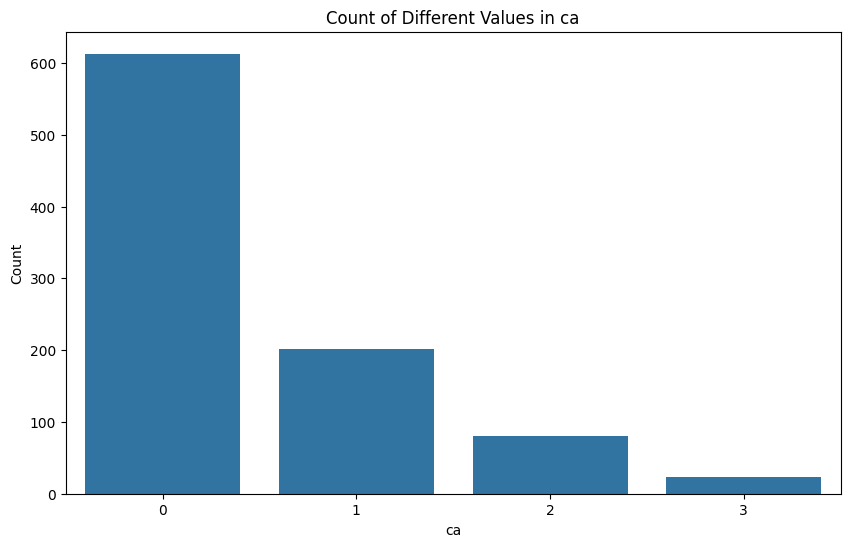

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ca', data=df)
plt.xlabel('ca')
plt.ylabel('Count')
plt.title('Count of Different Values in ca')
plt.show()

<Axes: xlabel='ca', ylabel='target'>

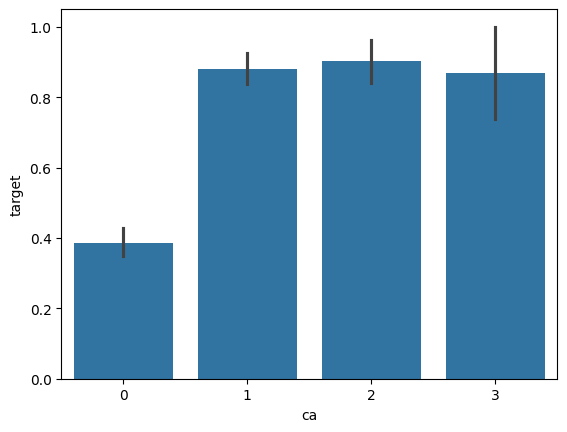

In [101]:
sns.barplot(x=df["ca"],y=df["target"])

In [102]:
df["thal"].unique()

array([6, 3, 7])

<Axes: xlabel='thal', ylabel='Density'>

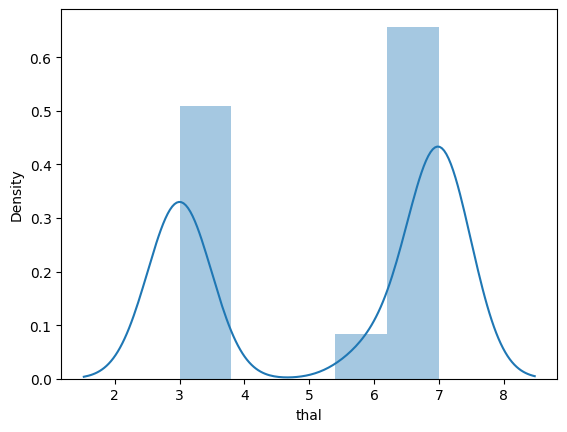

In [103]:
sns.distplot(df["thal"])

<Axes: xlabel='thal', ylabel='target'>

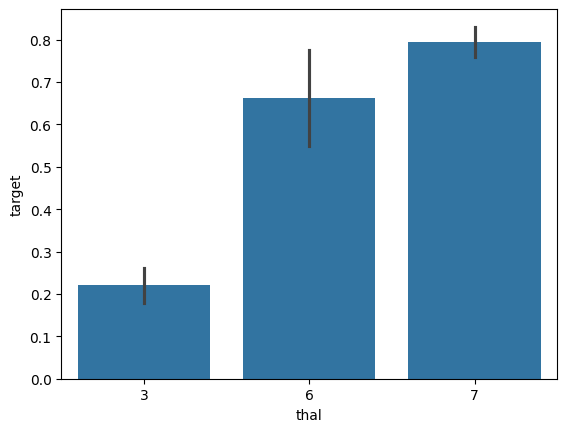

In [104]:
sns.barplot(x=df["thal"],y=df["target"])

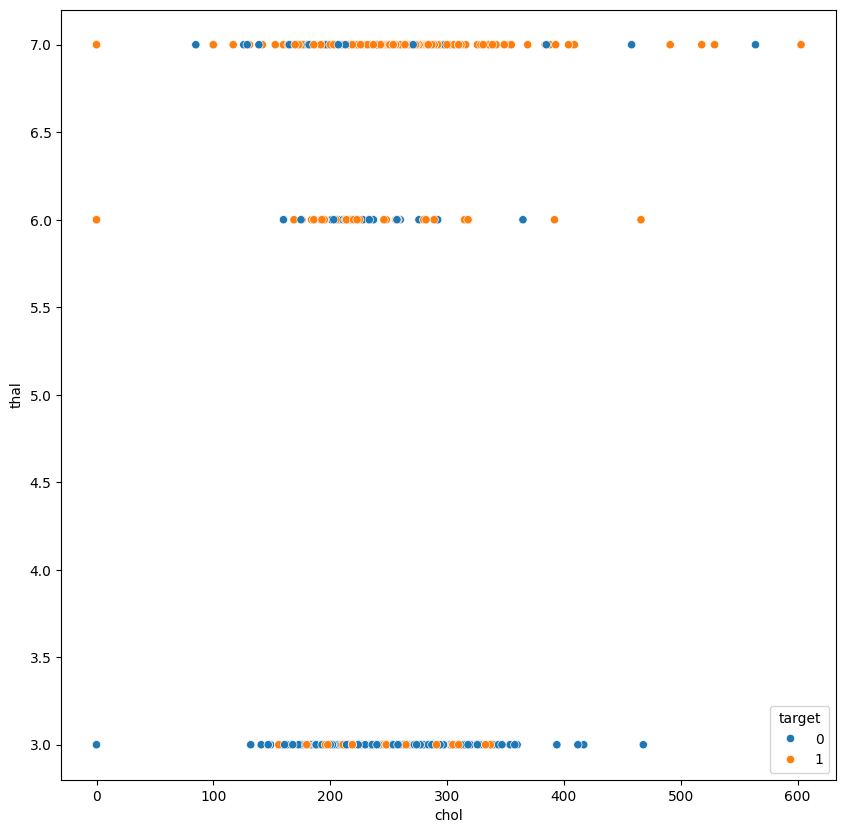

In [105]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='chol',y='thal',data=df,hue='target')
plt.show()

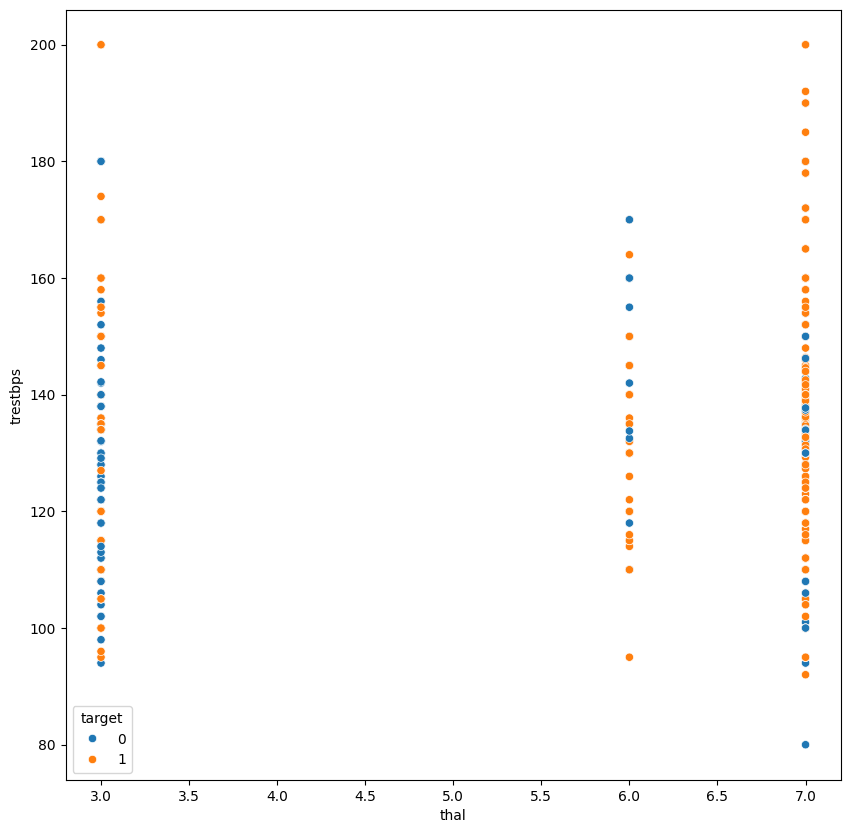

In [106]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='thal',y='trestbps',data=df,hue='target')
plt.show()

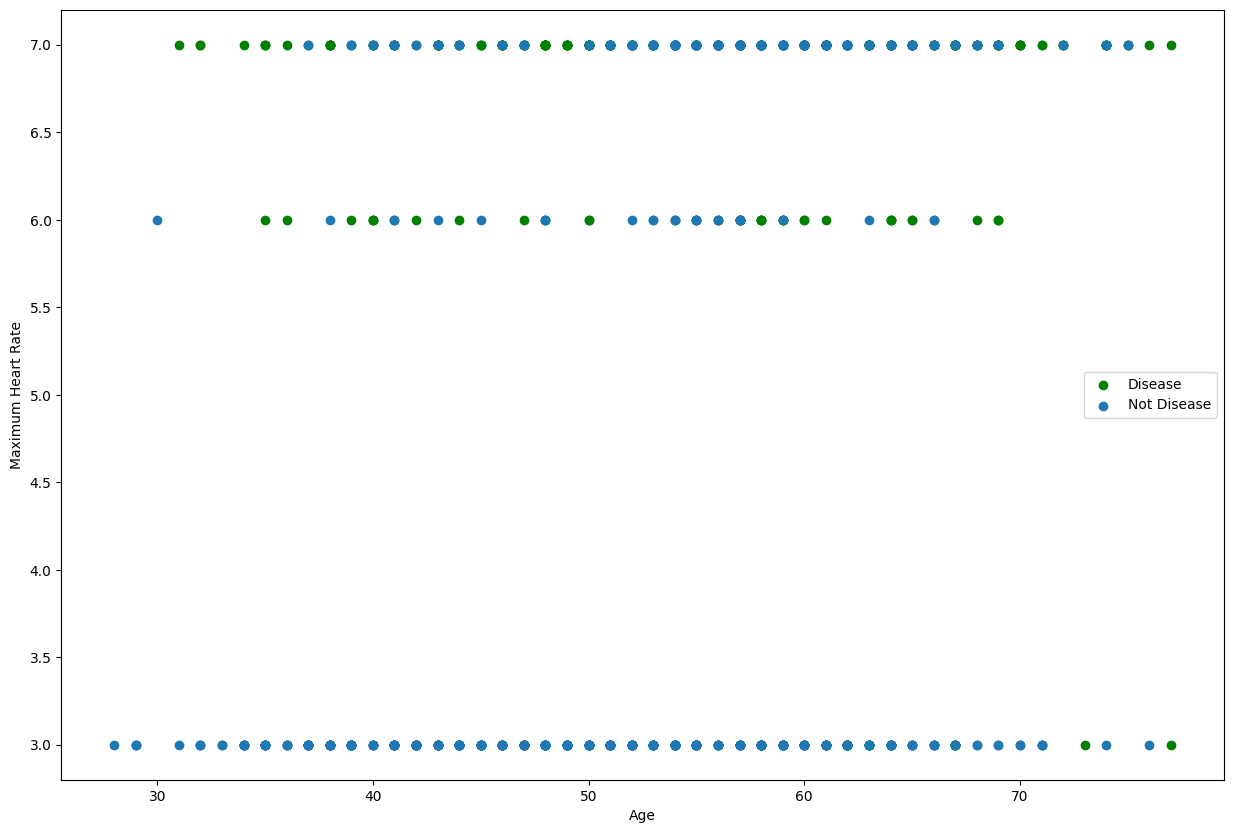

In [107]:
plt.figure(figsize=(15, 10))
plt.scatter(x=df.age[df.target==1], y=df.thal[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.thal[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

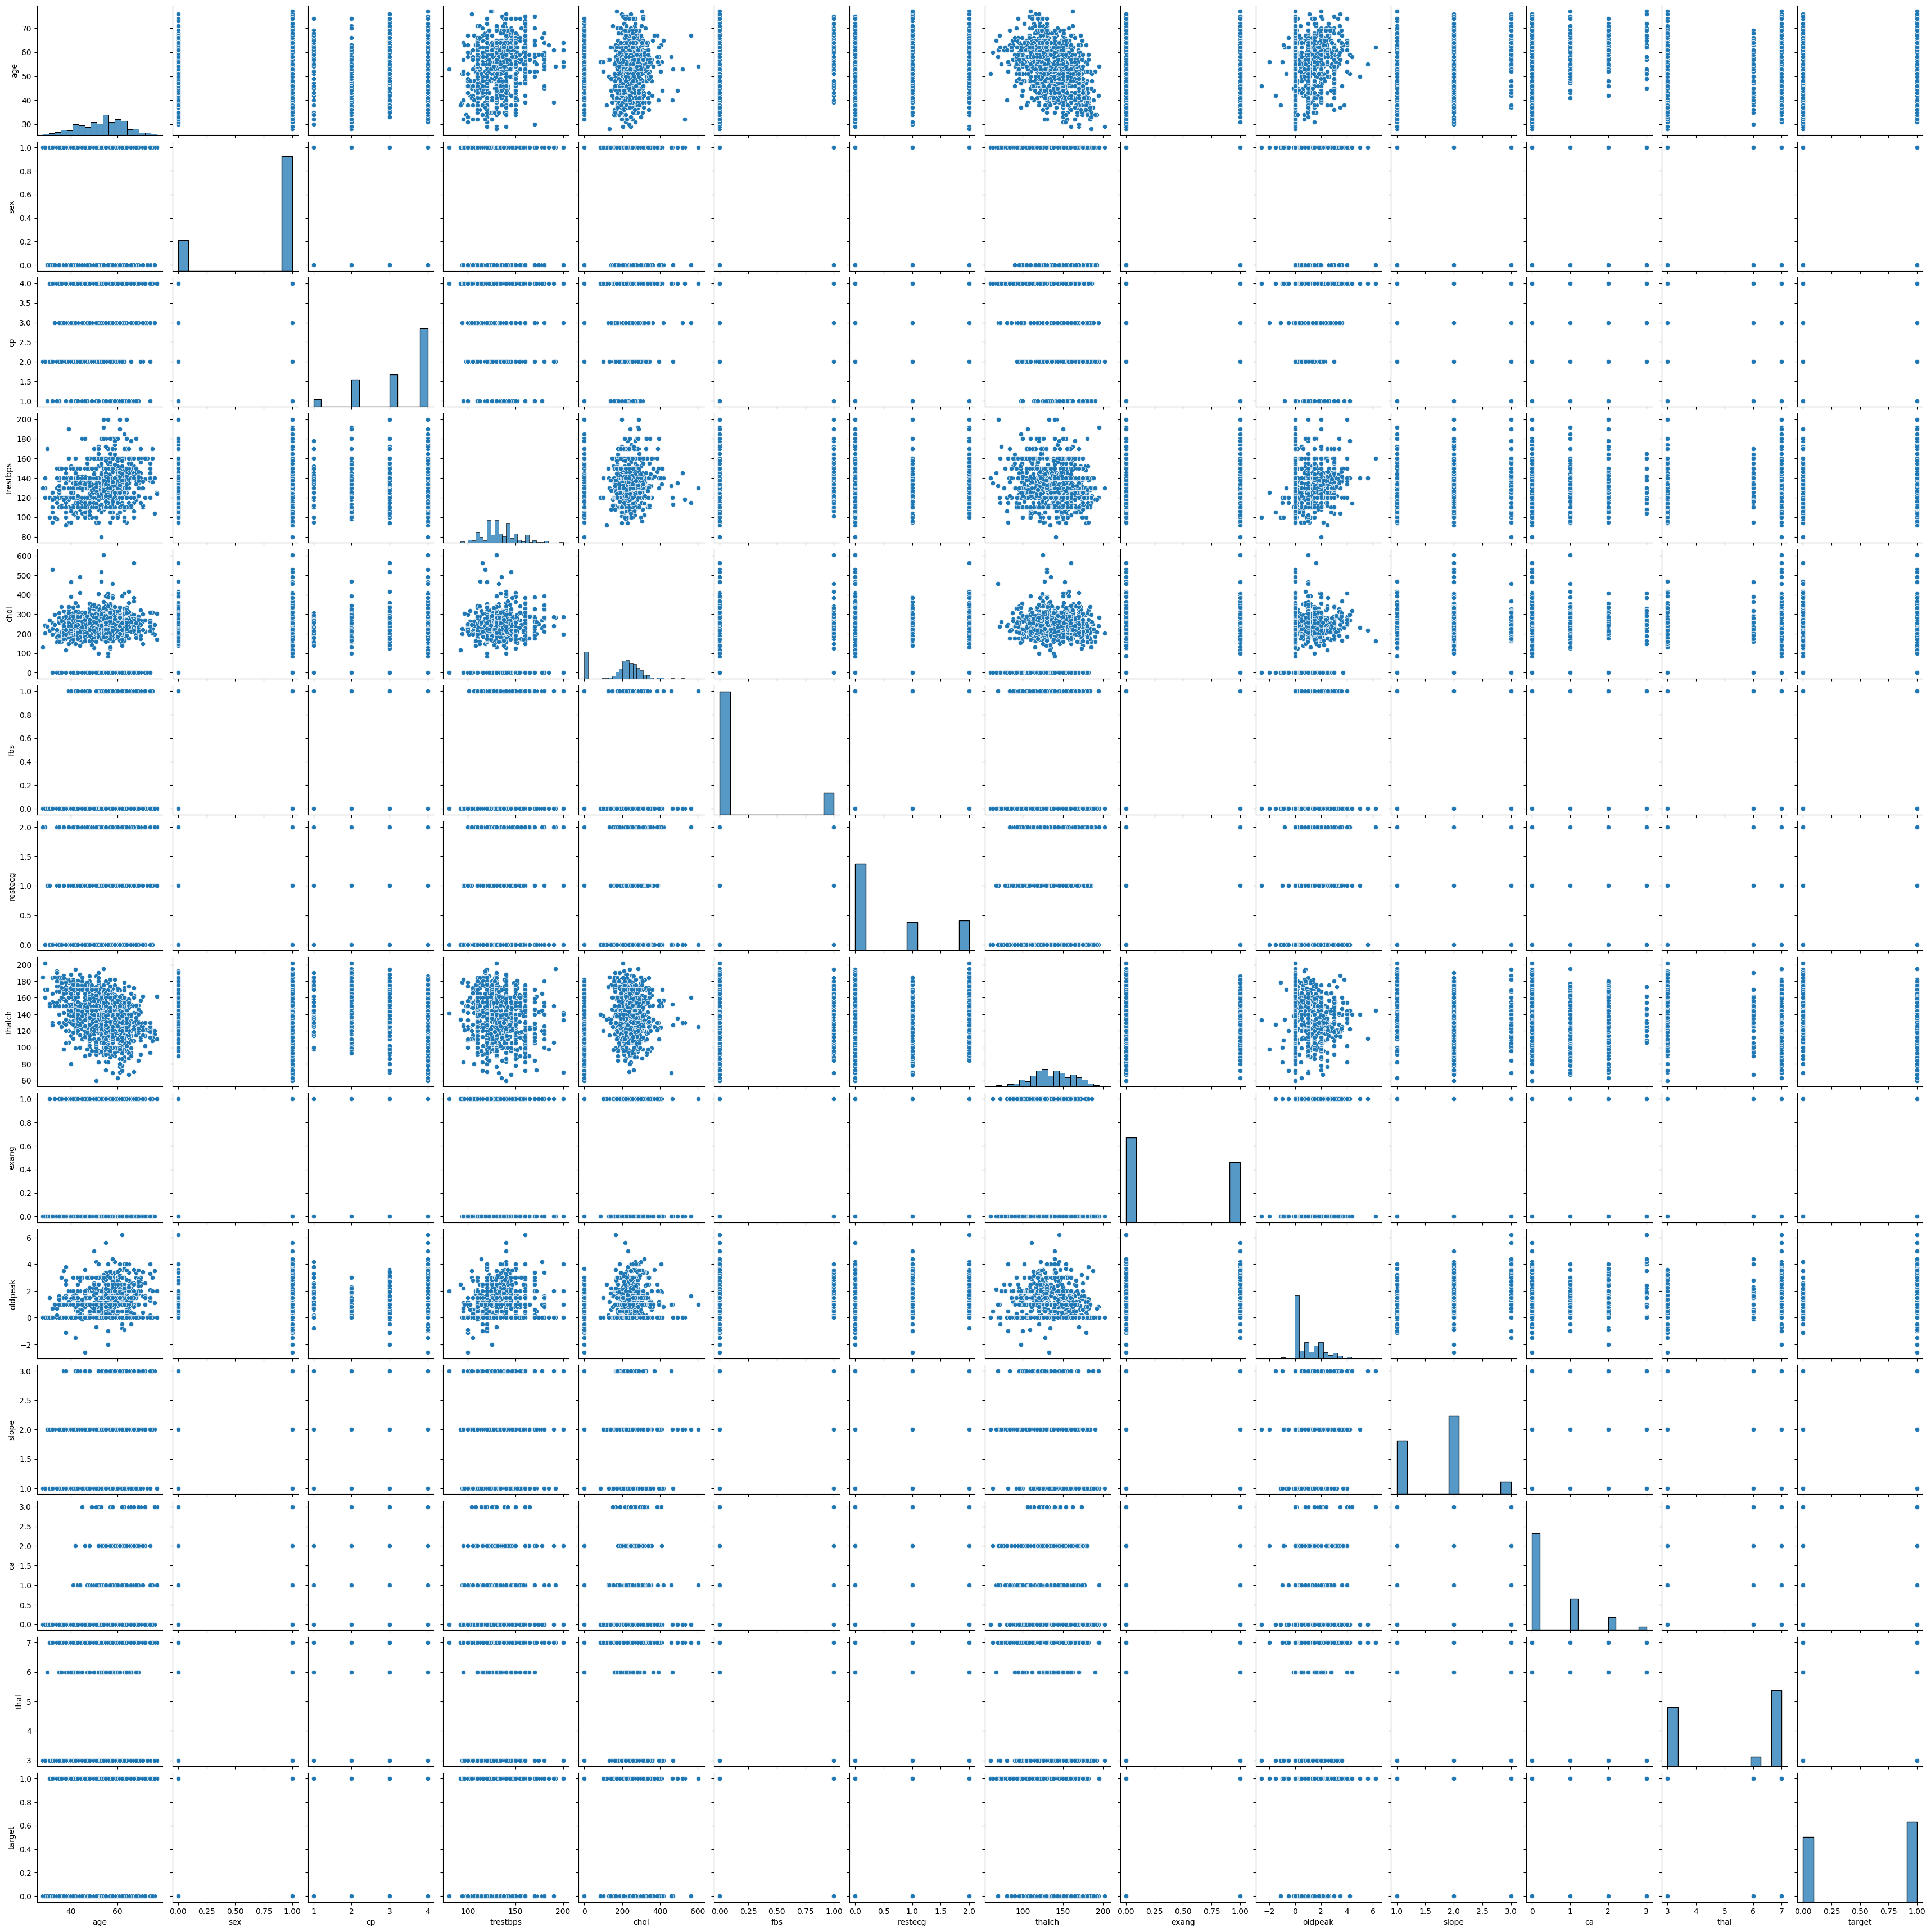

In [108]:
sns.pairplot(data=df)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 2000x1000 with 0 Axes>

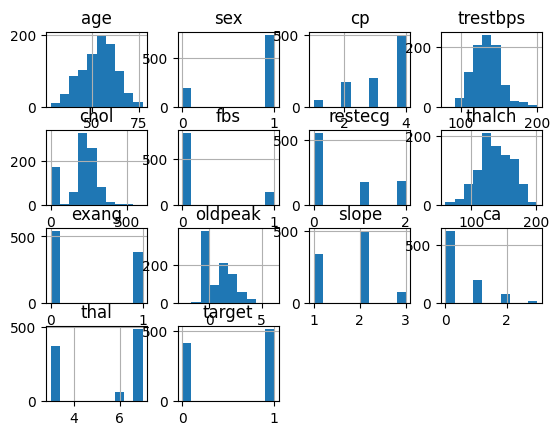

In [109]:
 plt.figure(figsize=(20, 10))
 df.hist()

In [110]:
# store numeric variables in cnames
cnames=['age','trestbps','chol','thalch','oldpeak','ca']


In [111]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
thal        0.555117
cp          0.472201
exang       0.450419
slope       0.447364
ca          0.417251
thalch      0.396414
oldpeak     0.384031
sex         0.306958
age         0.282673
chol        0.225491
trestbps    0.117471
fbs         0.108540
restecg     0.065429
Name: target, dtype: float64


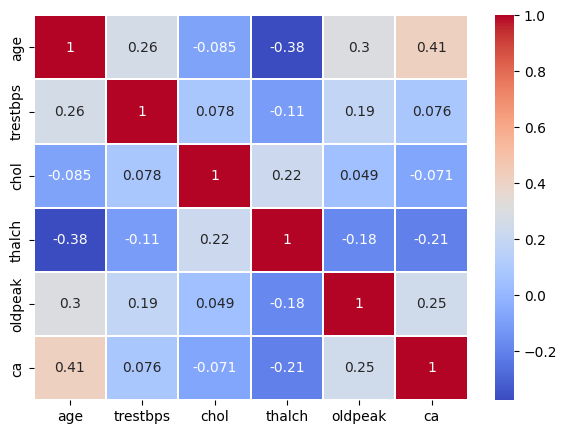

In [112]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = df.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [113]:
df_corr = df.loc[:,cnames]
df_corr

age  trestbps   chol  thalch  oldpeak  ca
0     63    145.00  233.0  150.00    2.300   0
1     67    160.00  286.0  108.00    1.500   3
2     67    120.00  229.0  129.00    2.600   2
3     37    130.00  250.0  187.00    3.500   0
4     41    130.00  204.0  172.00    1.400   0
..   ...       ...    ...     ...      ...  ..
915   54    127.00  333.0  154.00    0.000   0
916   62    137.72  139.0  129.53    1.834   0
917   55    122.00  223.0  100.00    0.000   1
918   58    146.22  385.0  121.25    2.512   0
919   62    120.00  254.0   93.00    0.000   1

[919 rows x 6 columns]

<Axes: xlabel='age', ylabel='Count'>

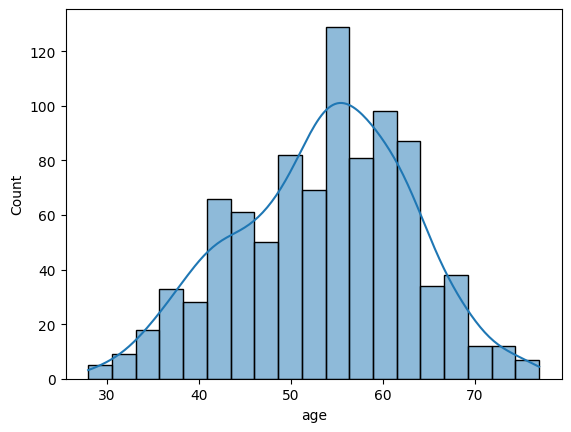

In [114]:
sns.histplot(df['age'], kde=True)

Mean: 53.50924918389554
Median: 54.0
Mode: 54


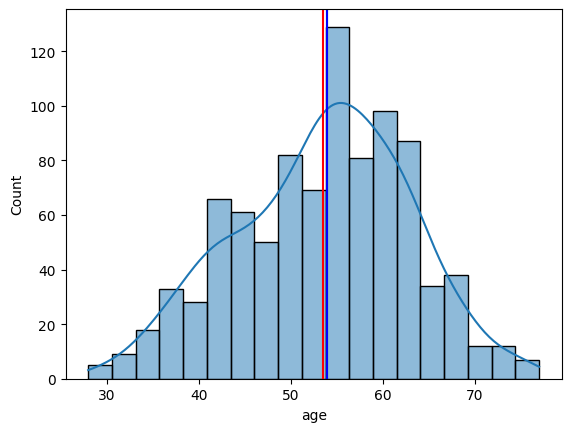

In [115]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [116]:
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

Observations

*   70 males in age range between 54-55
*   22 females in the age range between 54-55
*   So it means that according to this dataset males are getting heart disease more frequently then females










In [117]:
df['sex'].value_counts()

sex
1    725
0    194
Name: count, dtype: int64

In [118]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")


Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [119]:
df.groupby('sex')['age'].value_counts()

sex  age
0    54     15
     51     11
     62     10
     48      9
     43      9
            ..
1    77      2
     76      1
     33      1
     28      1
     31      1
Name: count, Length: 91, dtype: int64

Observations:
*   Males are 726 Females are 194
*   Male percentage in the data: 78.91%
*   Female Percentage in the data: 21.09%
*   Males are 274.23% more than females in the data.







##Train & Test Split

In [120]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 735 records and Testing features have 184 records.


In [121]:
X_train.shape

(735, 13)

In [122]:
X_test.shape

(184, 13)

In [123]:
Y_train.shape

(735,)

In [124]:
Y_test.shape

(184,)

The Model which will be used further is Random Forest

We can improve the Accuracy by Using other Machine Learning Models and by doing some Feature Engineering, Feature Selection and Hyperparameter Tuning

##Modeling and Predicting

In [125]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

###Logistic Regression

In [126]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0]


In [127]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.33 %


In [128]:
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)


Train accuracy: 86.39%
Test accuracy: 85.33%


In [129]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X_test, Y_test)

#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.8315217391304348

Confusion Matrix

In [130]:
matrix= confusion_matrix(Y_test, y_pred_lr)


<Axes: >

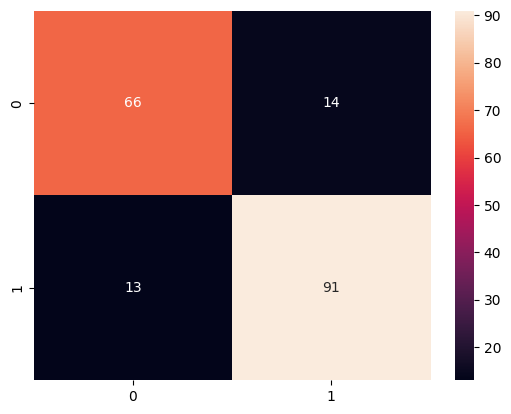

In [131]:
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [132]:
precision = precision_score(Y_test, y_pred_lr)

In [133]:
print("Precision: ",precision)

Precision:  0.8666666666666667


Recall

In [134]:
recall = recall_score(Y_test, y_pred_lr)

In [135]:
print("Recall is: ",recall)

Recall is:  0.875


F Score

In [136]:
print((2*precision*recall)/(precision+recall))

0.8708133971291866


In [137]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0    0   1
target        
0       66  14
1       13  91

In [138]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [139]:
fnr=FN*100/(FN+TP)
fnr

12.5

###Random Forest

In [140]:
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0]


Learning curve for Training score & cross validation score

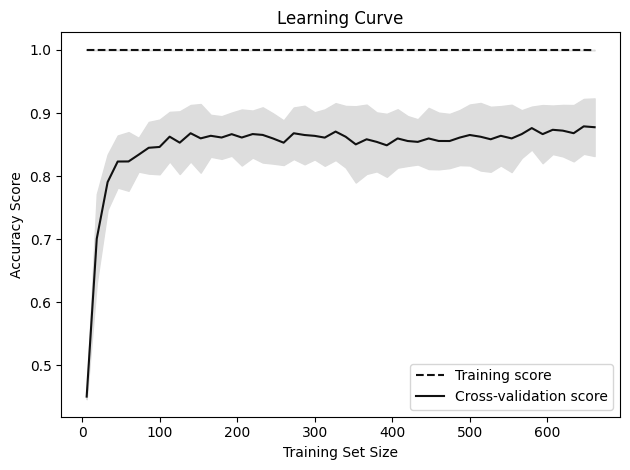

In [141]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [142]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 86.41 %


In [143]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.864


In [144]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.865
Accuracy on test set: 0.832


Confusion Matrix

In [145]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<Axes: >

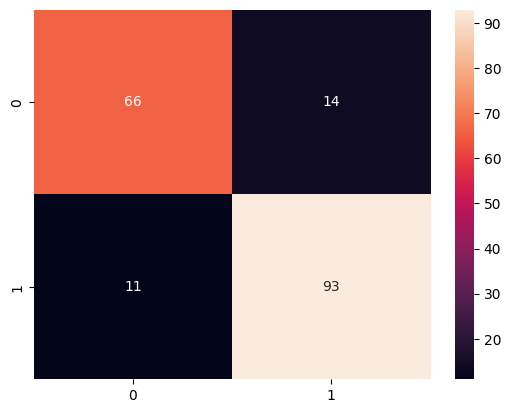

In [146]:
sns.heatmap(matrix,annot = True, fmt = "d")

Precision score

In [147]:
precision = precision_score(Y_test, y_pred_rf)

In [148]:
print("Precision: ",precision)

Precision:  0.8691588785046729


Recall

In [149]:
recall = recall_score(Y_test, y_pred_rf)

In [150]:
print("Recall is: ",recall)

Recall is:  0.8942307692307693


F Score

In [151]:
print((2*precision*recall)/(precision+recall))

0.881516587677725


In [152]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0    0   1
target        
0       66  14
1       11  93

In [153]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False negative rate of the model

In [154]:
fnr=FN*100/(FN+TP)
fnr


10.576923076923077

###Naive Bayes

In [155]:
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)


Train accuracy: 84.35%
Test accuracy: 82.61%
[0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0]


In [156]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 82.61 %


In [157]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 84.35%
Test accuracy: 82.61%


Confusion Matrix

In [158]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

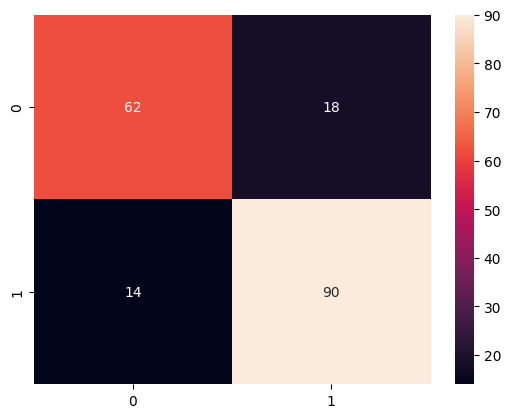

In [159]:
sns.heatmap(matrix,annot = True, fmt = "d")

Precision

In [160]:
precision = precision_score(Y_test, y_pred_nb)

In [161]:
print("Precision: ",precision)


Precision:  0.8333333333333334


Recall

In [162]:
recall = recall_score(Y_test, y_pred_nb)

In [163]:
print("Recall is: ",recall)

Recall is:  0.8653846153846154


F-Score

In [164]:
print((2*precision*recall)/(precision+recall))

0.8490566037735849


False negative rate of the model

In [165]:

fnr = FN*100/(FN+TP)
fnr

10.576923076923077

###KNN(K Nearest Neighbors)

In [166]:
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 76.73%
Test accuracy: 69.02%
[0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0]


In [167]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 69.02 %


In [168]:
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 77.82%
Test accuracy: 73.37%


In [169]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)


n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 67.93%
n_neigbors = 2
Train accuracy: 80.82%
Test accuracy: 67.93%
n_neigbors = 3
Train accuracy: 80.95%
Test accuracy: 73.37%
n_neigbors = 4
Train accuracy: 77.28%
Test accuracy: 71.20%
n_neigbors = 5
Train accuracy: 77.82%
Test accuracy: 73.37%
n_neigbors = 6
Train accuracy: 76.60%
Test accuracy: 69.57%
n_neigbors = 7
Train accuracy: 77.14%
Test accuracy: 71.20%
n_neigbors = 8
Train accuracy: 76.73%
Test accuracy: 69.02%
n_neigbors = 9
Train accuracy: 76.73%
Test accuracy: 70.65%


Confusion Matrix

In [170]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

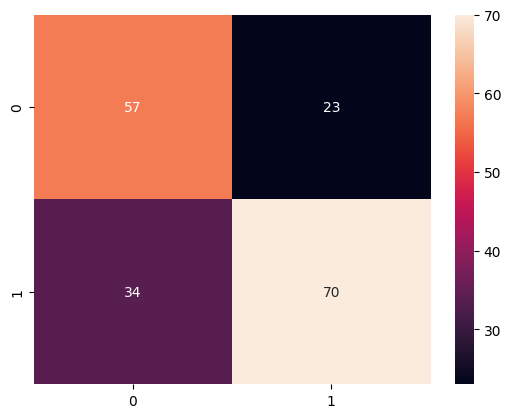

In [171]:
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [172]:
precision = precision_score(Y_test, y_pred_knn)

In [173]:
print("Precision: ",precision)

Precision:  0.7526881720430108


Recall

In [174]:
recall = recall_score(Y_test, y_pred_knn)

In [175]:
print("Recall is: ",recall)

Recall is:  0.6730769230769231


F-Score

In [176]:
print((2*precision*recall)/(precision+recall))

0.7106598984771574


In [177]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0    0   1
target        
0       57  23
1       34  70

In [178]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False negative rate of the model

In [179]:
fnr = FN*100/(FN+TP)
fnr

32.69230769230769

False negative rate

In [180]:
CM = pd.crosstab(Y_test, y_pred_knn)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

32.69230769230769

###Decision Tree

In [181]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0
 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0]


In [182]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")


The accuracy score achieved using Decision Tree is: 81.52 %


In [183]:
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.821


In [184]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.815


Decision Tree Visualization

In [185]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [186]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

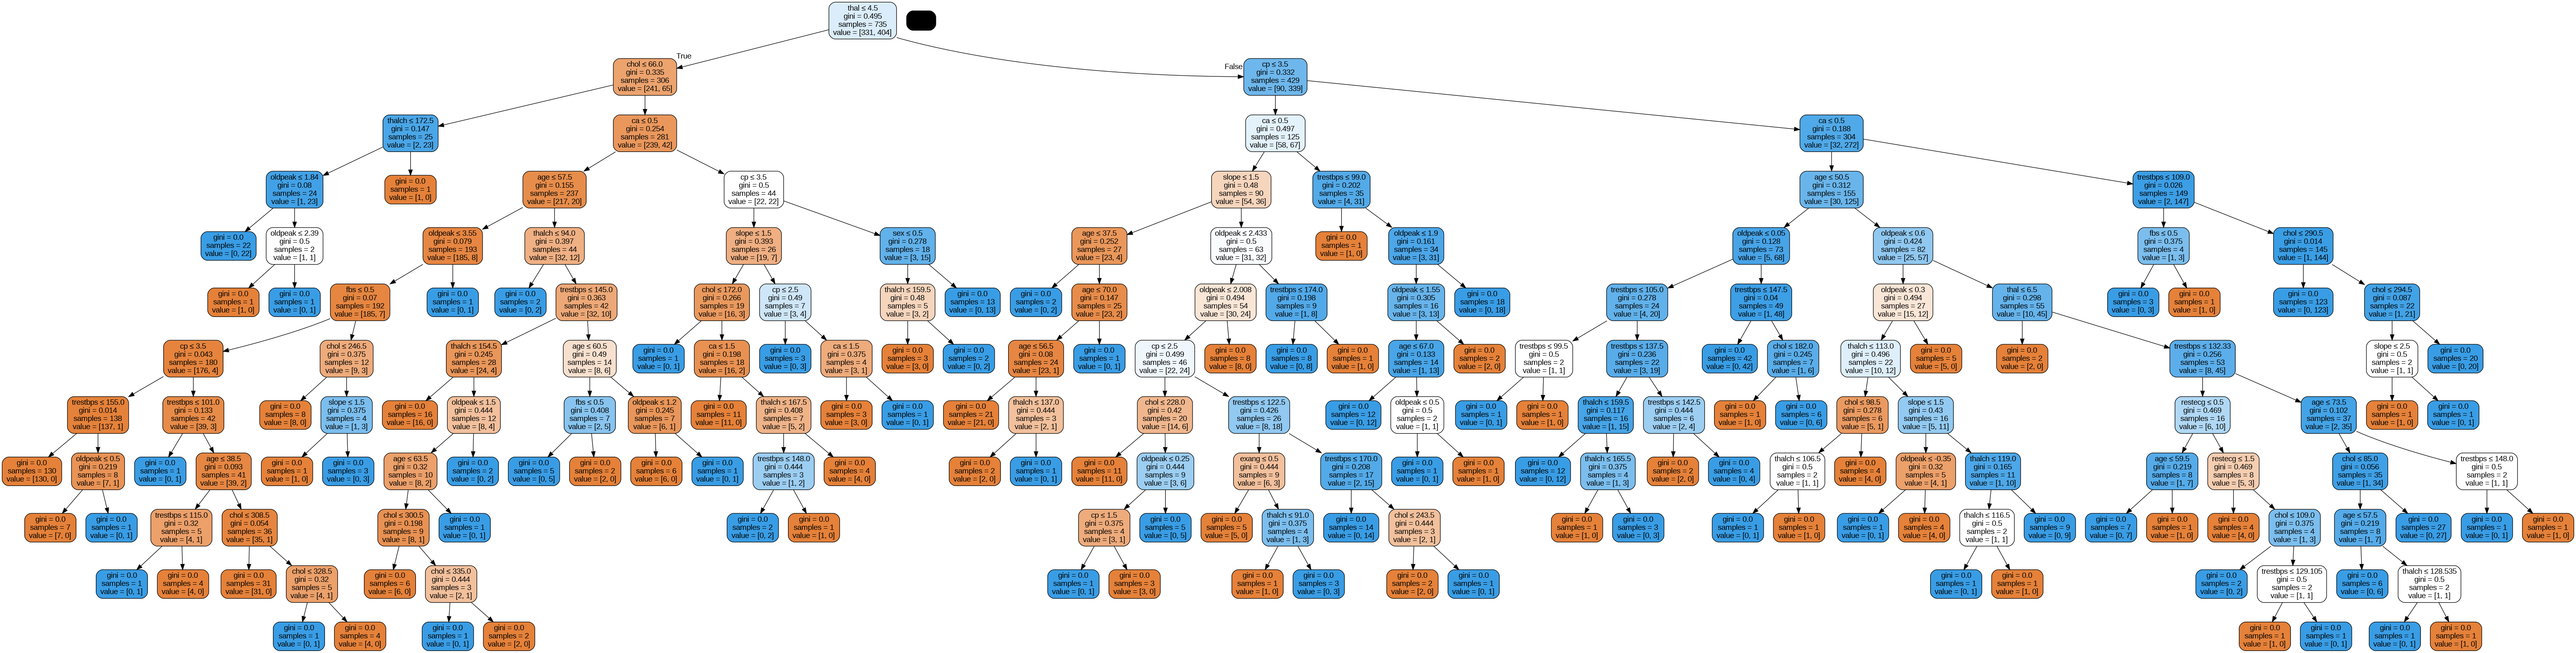

In [187]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

Depth 1

In [188]:
from sklearn import tree
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

DecisionTreeClassifier(max_depth=1, random_state=0)

In [189]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

DecisionTreeClassifier(max_depth=1, random_state=0)

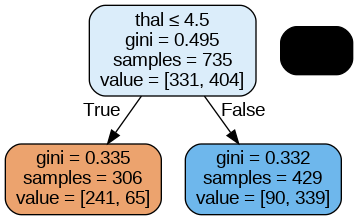

In [190]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

Confusion Matrix

In [191]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

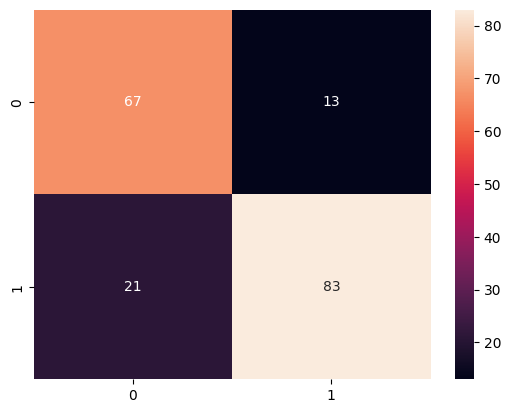

In [192]:
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [193]:
precision = precision_score(Y_test, y_pred_dt)

In [194]:
print("Precision: ",precision)


Precision:  0.8645833333333334


Recall

In [195]:
recall = recall_score(Y_test, y_pred_dt)

In [196]:
print("Recall is: ",recall)

Recall is:  0.7980769230769231


F-Score

In [197]:
print((2*precision*recall)/(precision+recall))

0.8300000000000001


In [198]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0    0   1
target        
0       67  13
1       21  83

False negative rate

In [199]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

20.192307692307693

##Final Score

In [200]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(),
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [201]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

accuracy
KNN                  0.690217
Decision Trees       0.815217
Logistic Regression  0.853261
Naive Bayes          0.826087
Random Forests       0.864130

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

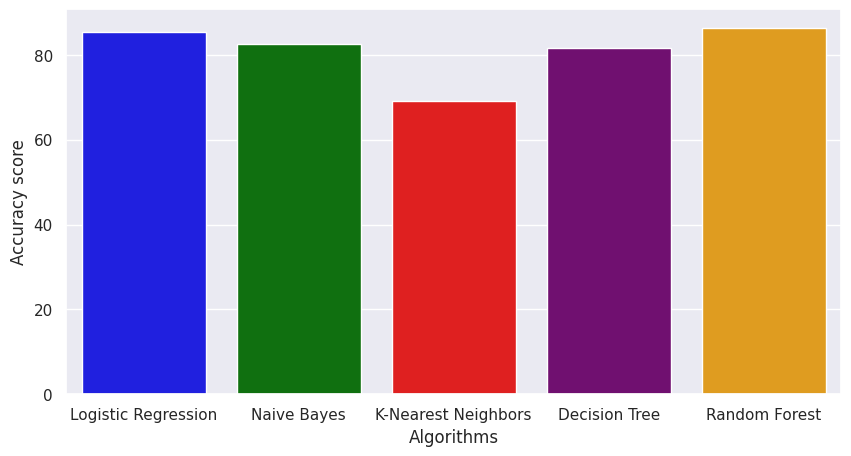

In [202]:
colors = ['blue', 'green', 'red', 'purple', 'orange']
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores, palette=colors)

In [203]:
# Save the model
import pickle
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf1, file)
print('Model Saved Succesfully!')

Model Saved Succesfully!
